
# 🧠 Exploratory Data Analysis (EDA)

## 📌 What is EDA?
Exploratory Data Analysis (EDA) is the first step in the data science or machine learning pipeline. It refers to the process of visually and statistically analyzing a dataset to summarize its main characteristics, often with the help of data visualization tools.

## ❓ Why Do We Do EDA?
- To **understand the structure** of the data.
- To **identify missing values**, outliers, and anomalies.
- To **validate assumptions** for modeling.
- To **spot patterns**, relationships, or clusters that may inform feature engineering.
- To **detect data leakage** or feature redundancy.

## 🎯 What Do We Achieve with EDA?
- Well-informed **feature selection and engineering**.
- Insights into **data quality** and **data distribution**.
- Identification of **model risks** due to imbalance, multicollinearity, or skewness.
- Creation of an **EDA report** that guides model development.

---

## 🧭 Main Sections Covered in This Notebook

We’ll explore each of these systematically:

1. **Load Dataset**
2. **Dataset Overview**
3. **Univariate Analysis**
4. **Bivariate Analysis**
5. **Multivariate Analysis**
6. **Missing Value Analysis**
7. **Outlier Detection**
8. **Skewness & Transformation**
9. **Target Analysis**
10. **Correlation Analysis**
11. **Class Imbalance**
12. **Cardinality Check**
13. **Data Quality Check**
14. **Time Series Profiling**
15. **Multicollinearity**
16. **Interaction Effects**
17. **Data Leakage Check**
18. **Feature Engineering Hints**
19. **Clustering Patterns**
20. **AutoEDA Tools**
21. **Statistical EDA**


# Banking Dataset


# 🧾 Banking Dataset: Feature Description & ML Use Cases

This notebook provides an in-depth understanding of each feature in the banking dataset, how they can be used in machine learning, and which combinations work well in different ML scenarios.

---

## 🔹 Column Descriptions and ML Applications

### `customer_id`
- **What it is**: Unique identifier for each customer.
- **Use in ML**: Not used directly. Used for grouping, joining, or identifying customer-level aggregates.

### `account_type`
- **What it is**: Type of bank account – Savings, Checking, or Salary.
- **Use in ML**: Categorical feature; can indicate transaction patterns or risk levels.

### `income`
- **What it is**: Customer’s monthly income.
- **Use in ML**: Strong predictor for creditworthiness and purchasing capacity.

### `credit_score`
- **What it is**: Score (300–900) indicating creditworthiness.
- **Use in ML**: Key feature for risk models and loan approvals.

### `employment_status`
- **What it is**: Employment type – Employed, Self-employed, or Unemployed.
- **Use in ML**: Used in segmentation, risk modeling, and credit scoring.

### `risk_segment`
- **What it is**: Bank’s internal risk bucket – High, Medium, Low.
- **Use in ML**: Useful for classification, stratification, or as a target class.

### `avg_monthly_balance`
- **What it is**: Customer's average balance over last 6 months.
- **Use in ML**: Stability indicator — useful for churn prediction or eligibility scoring.

### `num_transactions`
- **What it is**: Number of transactions in the last month.
- **Use in ML**: Activity metric — great for segmentation or transaction behavior modeling.

### `transaction_amount`
- **What it is**: Value of each transaction.
- **Use in ML**: Important for spending behavior or fraud detection.

### `transaction_type`
- **What it is**: Mode of transaction – UPI, ATM, POS, etc.
- **Use in ML**: Categorical behavior indicator.

### `transaction_date`
- **What it is**: Date of transaction.
- **Use in ML**: Used for time series analysis or temporal profiling.

### `txn_location`
- **What it is**: Location where the transaction occurred.
- **Use in ML**: Used in geographic or behavioral segmentation.

### `device_type`
- **What it is**: Platform used — Mobile, Web, or Branch.
- **Use in ML**: Behavioral feature, possibly useful in fraud or digital engagement.

### `has_credit_card`
- **What it is**: Indicates if customer has a credit card.
- **Use in ML**: Boolean feature for segmentation or credit modeling.

### `loan_approved`
- **What it is**: Whether the loan was approved (1) or not (0).
- **Use in ML**: **Target** for classification problems.

### `loan_amount`
- **What it is**: Amount approved for the loan (or 0 if not approved).
- **Use in ML**: Only valid if predicting loan amount **after** approval status.

### `loan_purpose`
- **What it is**: Purpose of the loan – Home, Education, Personal, etc.
- **Use in ML**: Categorical variable useful for segmentation or loan modeling.

### `credit_utilization`
- **What it is**: Ratio of credit used to credit limit.
- **Use in ML**: Important risk indicator.

### `default_history`
- **What it is**: Whether the customer has defaulted before.
- **Use in ML**: Strong binary predictor of risk.

### `branch_rating`
- **What it is**: Internal rating (1 to 5) of the branch.
- **Use in ML**: Proxy for customer experience or support quality.

### `potential_data_leakage`
- **What it is**: Flag to identify whether `loan_amount` was filled when loan was not approved.
- **Use in ML**: Prevent data leakage — use to filter or mask problematic rows.

---

## 📦 Common Feature Combinations for ML Use Cases

| Use Case                | Recommended Feature Combos |
|-------------------------|----------------------------|
| 🎯 Loan Approval Prediction | income, credit_score, employment_status, has_credit_card, risk_segment |
| 🧠 Customer Segmentation    | account_type, income, num_transactions, device_type, txn_location |
| ⚠️ Fraud Detection          | transaction_amount, transaction_type, device_type, txn_location, transaction_date |
| 💳 Creditworthiness Scoring| credit_utilization, default_history, credit_score, avg_monthly_balance |
| 📈 Time Series Profiling    | transaction_date, transaction_amount, rolling stats |
| 🧪 Feature Engineering      | transaction velocity, recency, customer tenure |

---

Use this reference as a guide while exploring the dataset in your EDA or modeling workflow.



## 📥 Section 1: Load Dataset

The first technical step in any EDA pipeline is to load your dataset into a usable structure — typically a pandas DataFrame. This allows us to begin the process of exploration, transformation, and analysis.

**In this notebook, we will use a synthetic Banking Transactions dataset** designed to simulate real-world complexity and cover all EDA topics, such as:
- Customer demographics
- Transaction history
- Credit behavior
- Loan approvals

Let's begin by loading the dataset.


In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="IPython")

In [2]:
import pandas as pd

# Load the banking dataset
df = pd.read_csv("EDA_Banking_dataset.csv")

# Convert transaction_date to datetime
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

# Preview dataset
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns.tolist())
df.head()

Dataset Shape: (100000, 21)
Column Names: ['customer_id', 'account_type', 'income', 'credit_score', 'employment_status', 'risk_segment', 'avg_monthly_balance', 'num_transactions', 'transaction_amount', 'transaction_type', 'transaction_date', 'txn_location', 'device_type', 'has_credit_card', 'loan_approved', 'loan_amount', 'loan_purpose', 'credit_utilization', 'default_history', 'branch_rating', 'potential_data_leakage']


customer_id account_type    income  credit_score employment_status  \
0   CUST00001     Checking  38985.86         727.0     Self-employed   
1   CUST00001     Checking  38985.86         727.0     Self-employed   
2   CUST00001     Checking  38985.86         727.0     Self-employed   
3   CUST00001     Checking  38985.86         727.0     Self-employed   
4   CUST00001     Checking  38985.86         727.0     Self-employed   

  risk_segment  avg_monthly_balance  num_transactions  transaction_amount  \
0       Medium             13080.97                32             4049.11   
1       Medium             13080.97                32             3626.64   
2       Medium             13080.97                32             7761.47   
3       Medium             13080.97                32             6930.75   
4       Medium             13080.97                32            19373.61   

  transaction_type  ...     txn_location device_type has_credit_card  \
0              ATM  ...      Moralesfort      Mobile               1   
1              UPI  ...     Deborahburgh         Web               1   
2              UPI  ...       South Adam      Branch               1   
3              ATM  ...        Marymouth      Branch               1   
4            Debit  ...  Lake Susanmouth      Branch               1   

   loan_approved  loan_amount  loan_purpose credit_utilization  \
0              1    230617.62      Personal               0.92   
1              1    230617.62      Personal               0.92   
2              1    230617.62      Personal               0.92   
3              1    230617.62      Personal               0.92   
4              1    230617.62      Personal               0.92   

   default_history  branch_rating  potential_data_leakage  
0                1              2                       0  
1                1              2                       0  
2                1              2                       0  
3                1              2                       0  
4                1              2                       0  

[5 rows x 21 columns]

	•	✅ The dataset was successfully loaded using pandas.read_csv().
	•	✅ transaction_date was converted to datetime.
	•	✅ The first 5 rows of the dataset were displayed, showing realistic values for:
	•	income, credit_score, transaction_amount, and loan_approved.

## 🧾 Section 2: Dataset Overview

Before diving into detailed analysis, it's essential to get a **quick overview of the dataset**. This includes understanding:

- The number of rows and columns
- The data types of each feature
- The presence of any missing values
- The structure of categorical and numerical features
- Memory usage (important for large datasets)

This helps in identifying immediate data issues and shapes the direction of EDA strategies.

In [3]:
# 📦 Basic Dataset Structure
print("✅ Shape of dataset:", df.shape)

# 🧾 Data Types and Non-null Counts
print("\n🧾 Dataset Info:")
df.info()

# 📊 Summary Statistics (Numerical)
print("\n📊 Summary Statistics (Numerical Features):")
display(df.describe().T)

# 🔤 Summary for Categorical Features
print("\n🔤 Summary Statistics (Categorical Features):")
display(df.describe(include='object').T)

# 🔍 Missing Value Check
print("\n🔍 Missing Values (only columns with nulls):")
missing_vals = df.isnull().sum()
display(missing_vals[missing_vals > 0].sort_values(ascending=False))

✅ Shape of dataset: (100000, 21)

🧾 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   customer_id             100000 non-null  object        
 1   account_type            100000 non-null  object        
 2   income                  100000 non-null  float64       
 3   credit_score            100000 non-null  float64       
 4   employment_status       100000 non-null  object        
 5   risk_segment            100000 non-null  object        
 6   avg_monthly_balance     100000 non-null  float64       
 7   num_transactions        100000 non-null  int64         
 8   transaction_amount      100000 non-null  float64       
 9   transaction_type        100000 non-null  object        
 10  transaction_date        100000 non-null  datetime64[ns]
 11  txn_location            100000 non-null  o

count                        mean  \
income                  100000.0                49958.178816   
credit_score            100000.0                    680.5408   
avg_monthly_balance     100000.0                20141.573444   
num_transactions        100000.0                     29.9356   
transaction_amount      100000.0                19673.188508   
transaction_date          100000  2025-04-10 00:32:45.600000   
has_credit_card         100000.0                      0.4944   
loan_approved           100000.0                       0.494   
loan_amount             100000.0               192899.861394   
credit_utilization      100000.0                    0.490656   
default_history         100000.0                      0.5076   
branch_rating           100000.0                      3.0464   
potential_data_leakage  100000.0                      0.4784   

                                        min                  25%  \
income                            -10969.05            40262.615   
credit_score                          517.0                649.0   
avg_monthly_balance               -15218.08            13211.865   
num_transactions                       15.0                 26.0   
transaction_amount                    50.27            4767.6475   
transaction_date        2025-01-02 00:00:00  2025-02-03 00:00:00   
has_credit_card                         0.0                  0.0   
loan_approved                           0.0                  0.0   
loan_amount                             0.0           144999.655   
credit_utilization                      0.0                 0.24   
default_history                         0.0                  0.0   
branch_rating                           1.0                  2.0   
potential_data_leakage                  0.0                  0.0   

                                        50%                  75%  \
income                            50074.445              60051.6   
credit_score                          680.0                711.0   
avg_monthly_balance               19875.915           26853.4025   
num_transactions                       30.0                 34.0   
transaction_amount                  9338.06           25246.0225   
transaction_date        2025-03-15 00:00:00  2025-05-03 00:00:00   
has_credit_card                         0.0                  1.0   
loan_approved                           0.0                  1.0   
loan_amount                      194831.325          248171.7075   
credit_utilization                     0.49                 0.73   
default_history                         1.0                  1.0   
branch_rating                           3.0                  4.0   
potential_data_leakage                  0.0                  1.0   

                                        max           std  
income                            106662.35  14973.502028  
credit_score                          855.0     47.493398  
avg_monthly_balance                53373.82   10018.57735  
num_transactions                       52.0      5.343757  
transaction_amount                 99986.39  22529.583412  
transaction_date        2025-12-04 00:00:00           NaN  
has_credit_card                         1.0      0.499971  
loan_approved                           1.0      0.499966  
loan_amount                       493705.74  79278.609276  
credit_utilization                      1.0      0.285203  
default_history                         1.0      0.499945  
branch_rating                           5.0      1.410626  
potential_data_leakage                  1.0      0.499536


🔤 Summary Statistics (Categorical Features):


count unique            top   freq
customer_id        100000   2500      CUST00001     40
account_type       100000      3       Checking  33960
employment_status  100000      3  Self-employed  34600
risk_segment       100000      3         Medium  33720
transaction_type   100000      5            UPI  20056
txn_location       100000  38007    New Michael     95
device_type        100000      3            Web  33495
loan_purpose       100000      5       Business  20680


🔍 Missing Values (only columns with nulls):


Series([], dtype: int64)

## 📊 Section 3: Univariate Analysis

Univariate analysis focuses on examining **one feature at a time**. This helps in understanding the **distribution**, **spread**, and **patterns** in individual features — both categorical and numerical.

We aim to:
- Identify skewed distributions or outliers
- Understand common categories and class imbalances
- Detect unexpected or invalid values

### 🔍 Strategy:
- Use **histograms**, **boxplots**, and **KDE plots** for numerical features
- Use **count plots** or **value_counts()** for categorical features

🔢 Numerical Features: ['income', 'credit_score', 'avg_monthly_balance', 'num_transactions', 'transaction_amount', 'has_credit_card', 'loan_approved', 'loan_amount', 'credit_utilization', 'default_history', 'branch_rating', 'potential_data_leakage']


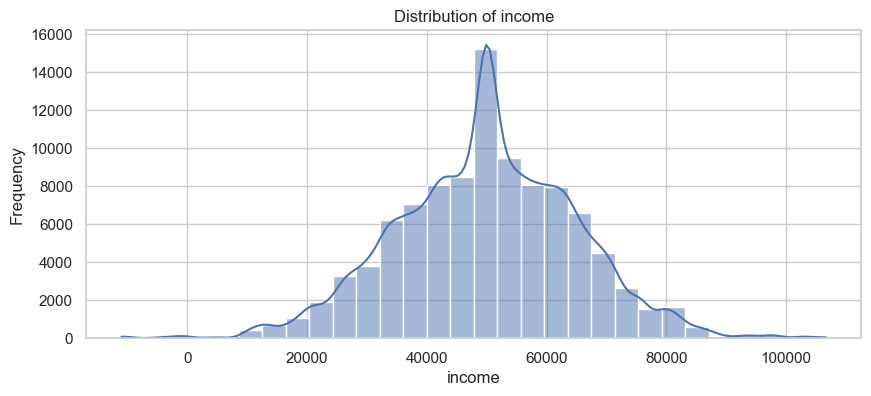

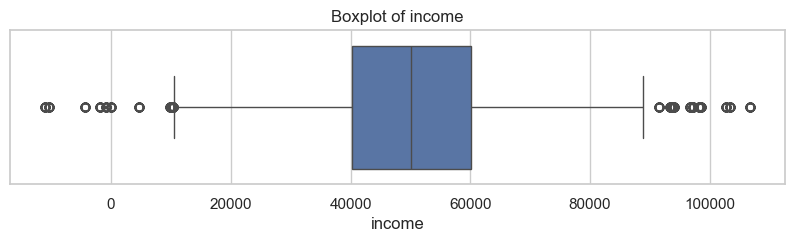

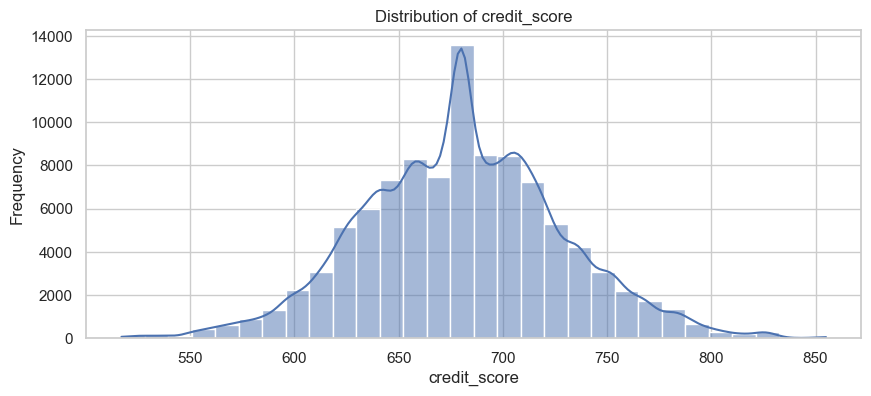

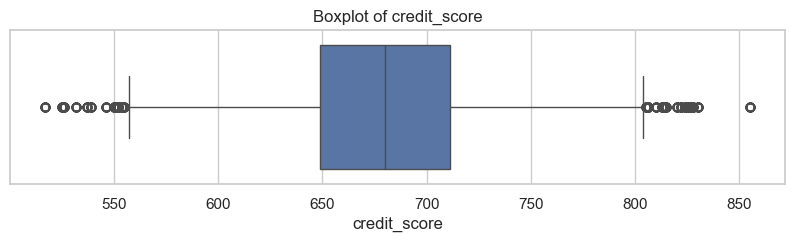

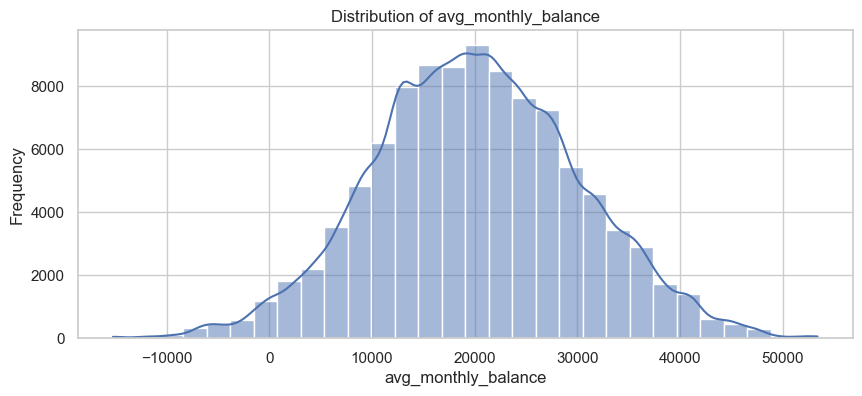

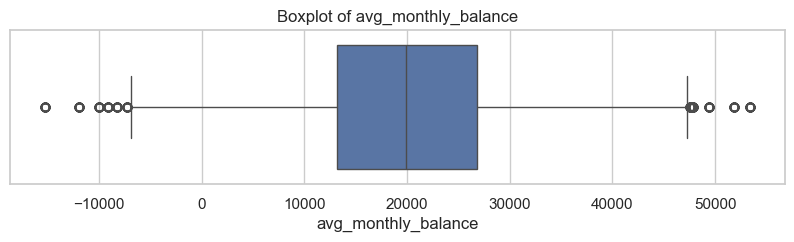

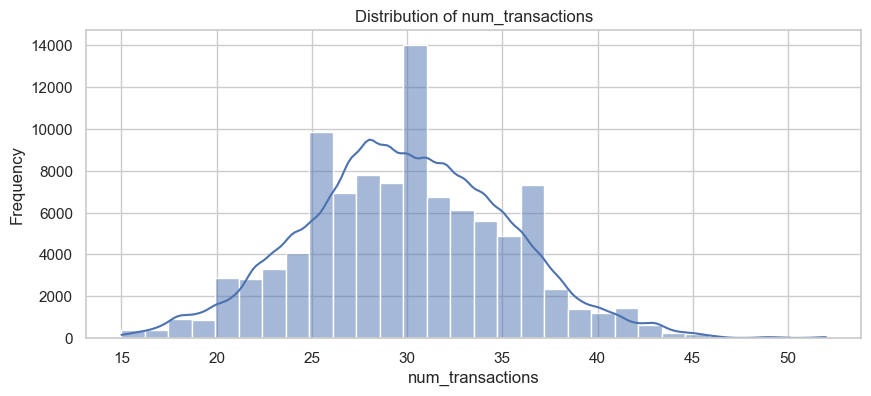

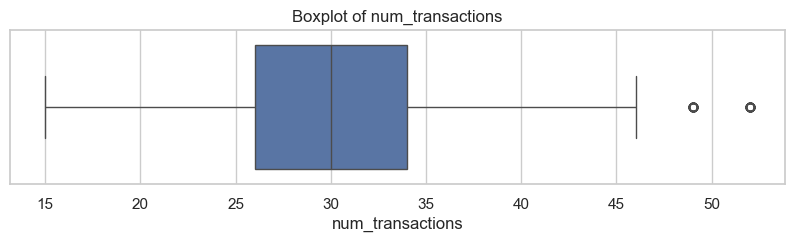

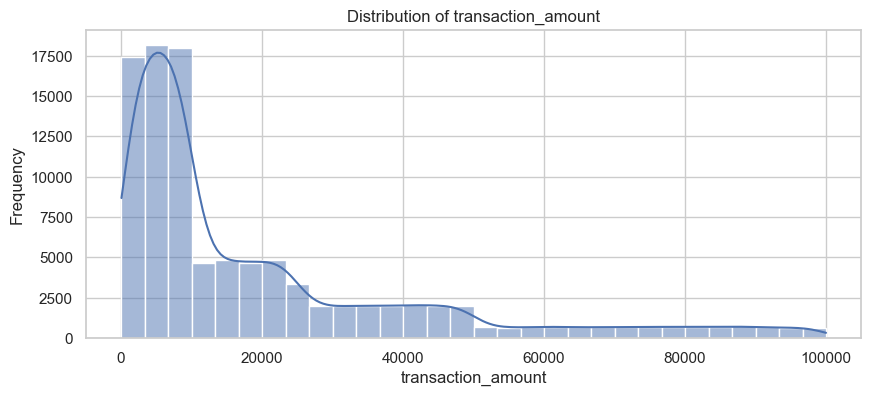

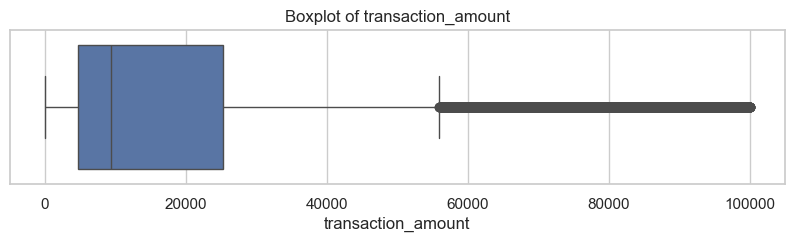

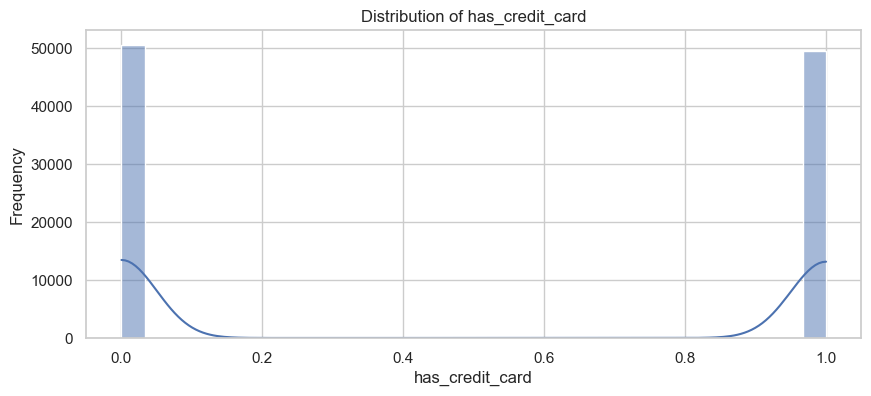

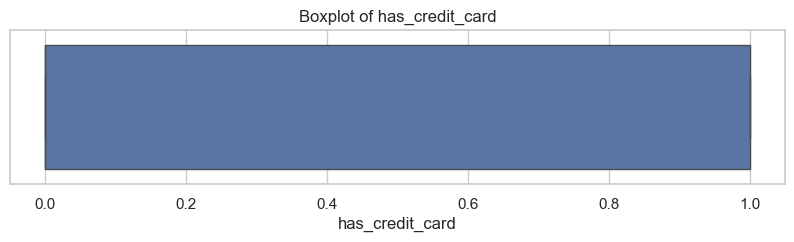

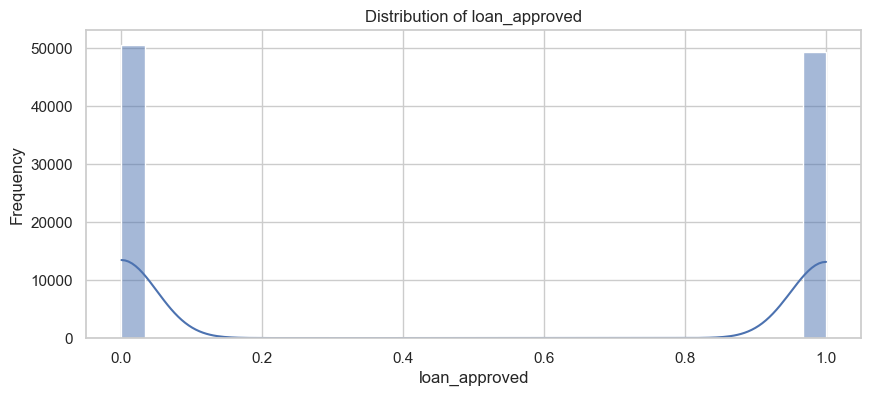

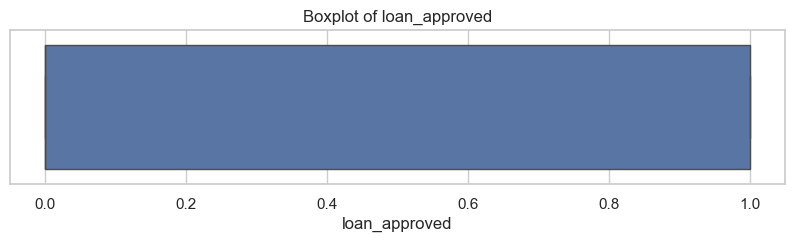

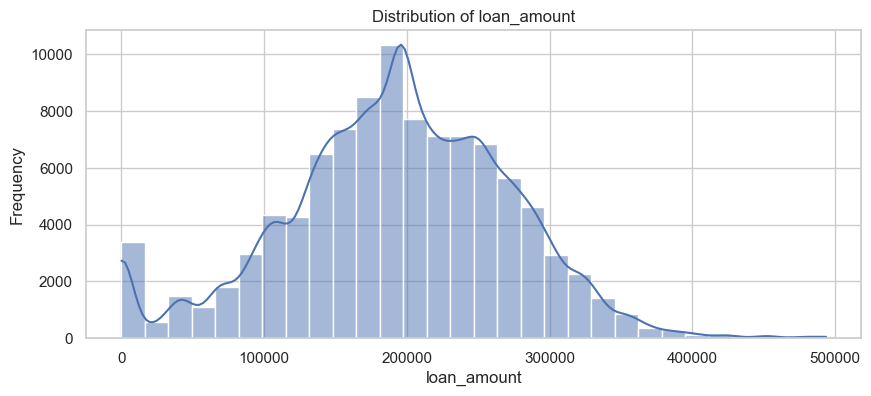

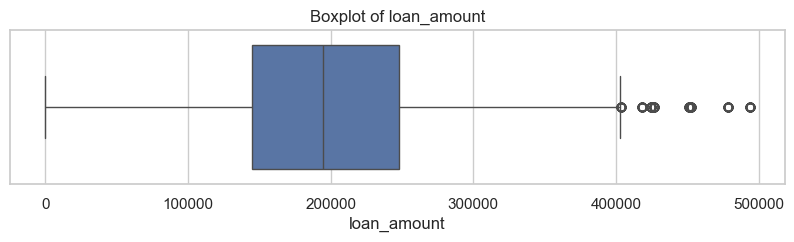

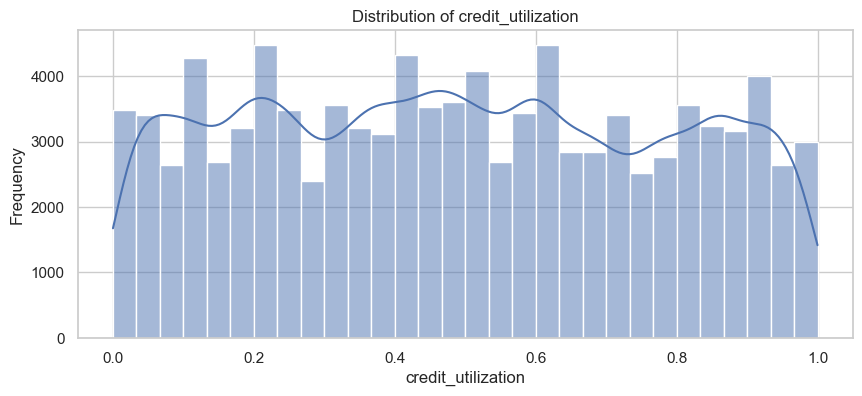

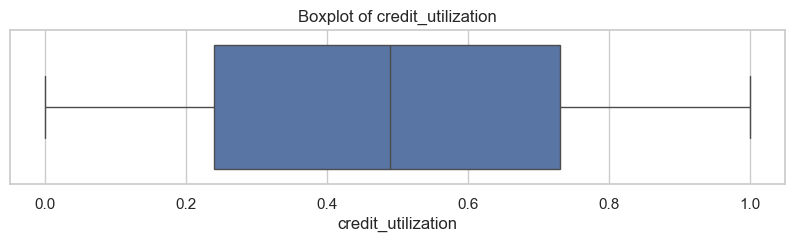

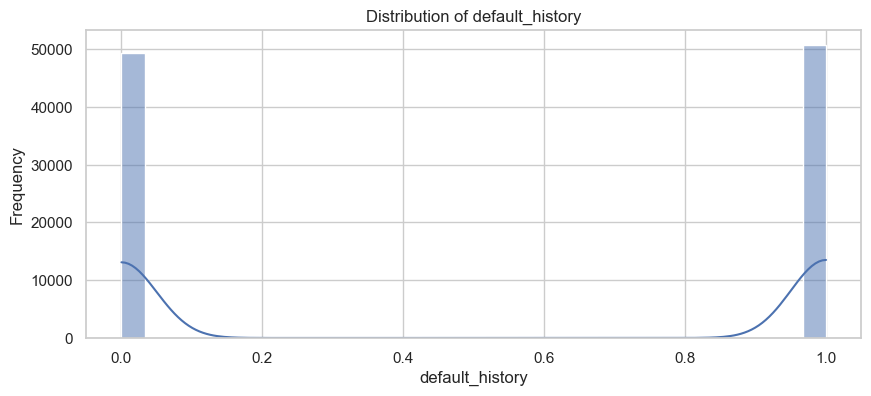

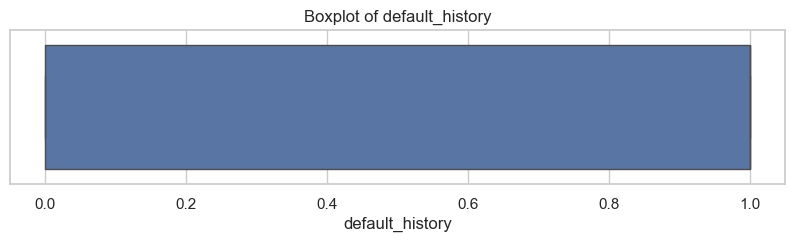

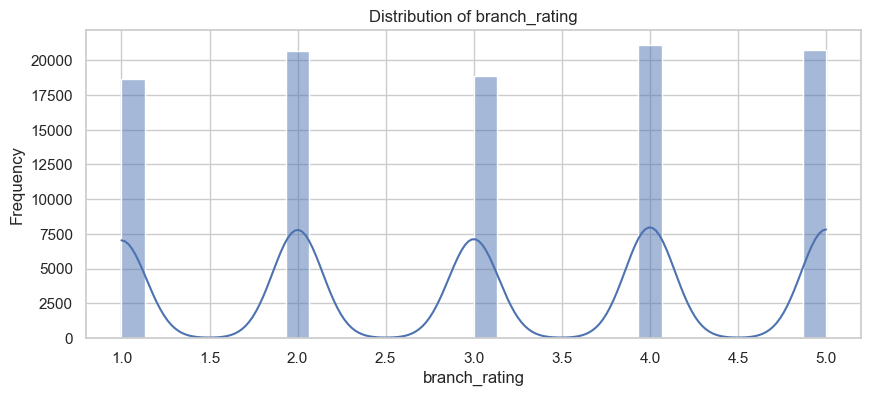

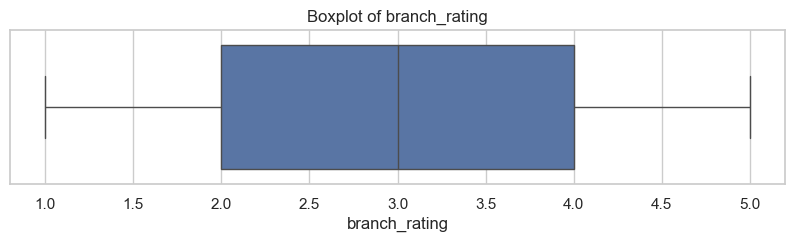

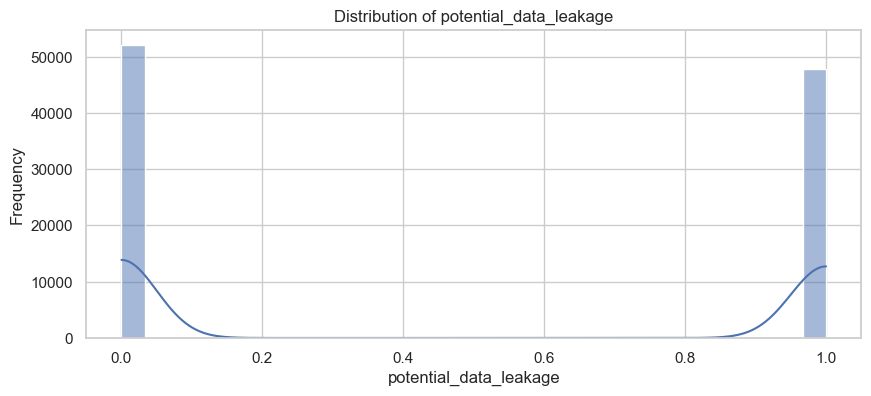

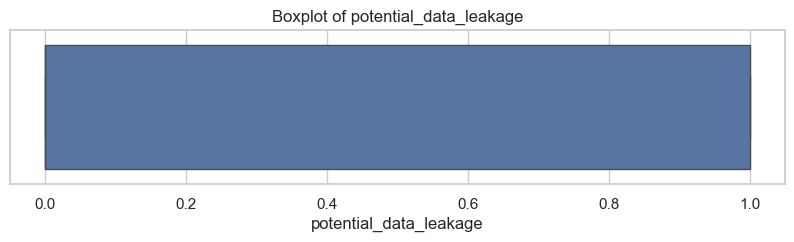

🔤 Categorical Features: ['customer_id', 'account_type', 'employment_status', 'risk_segment', 'transaction_type', 'txn_location', 'device_type', 'loan_purpose']


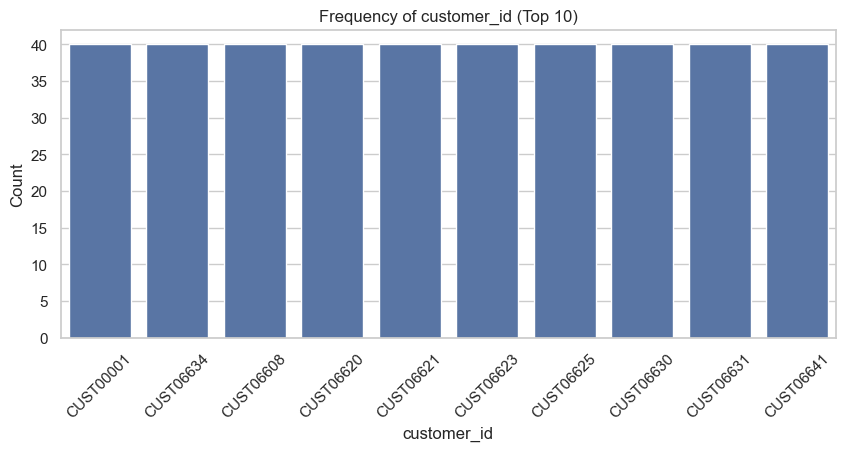

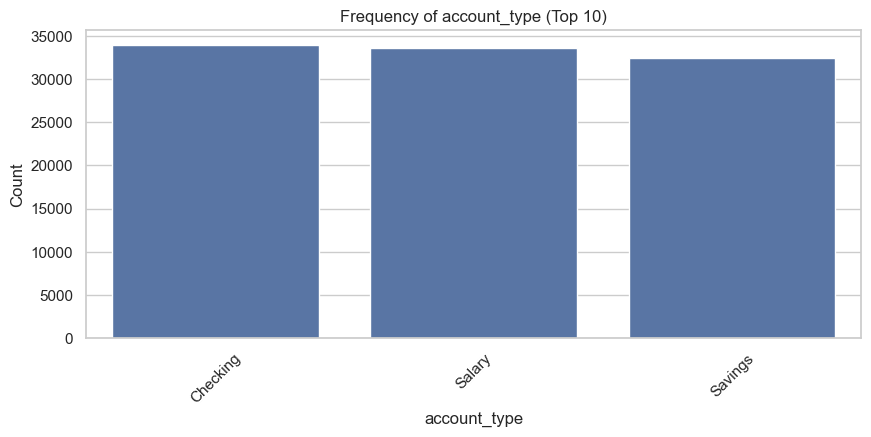

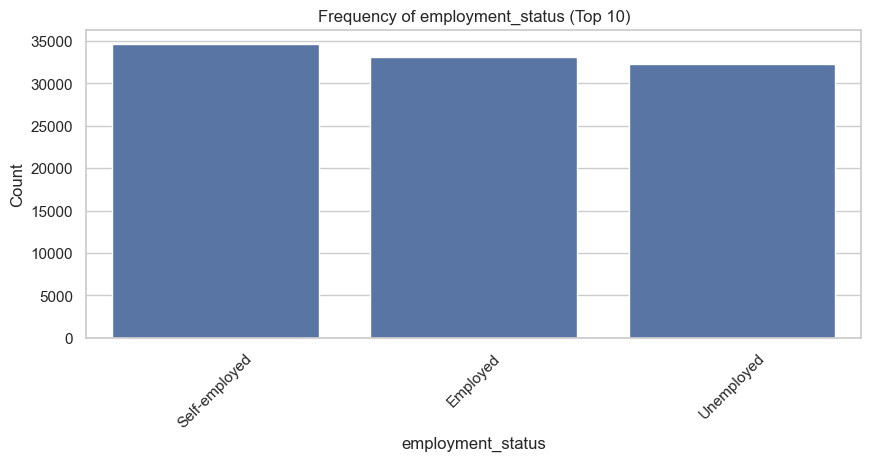

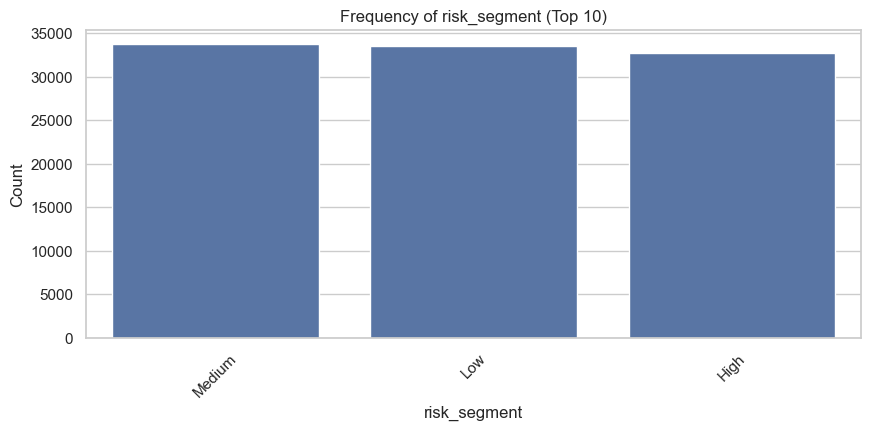

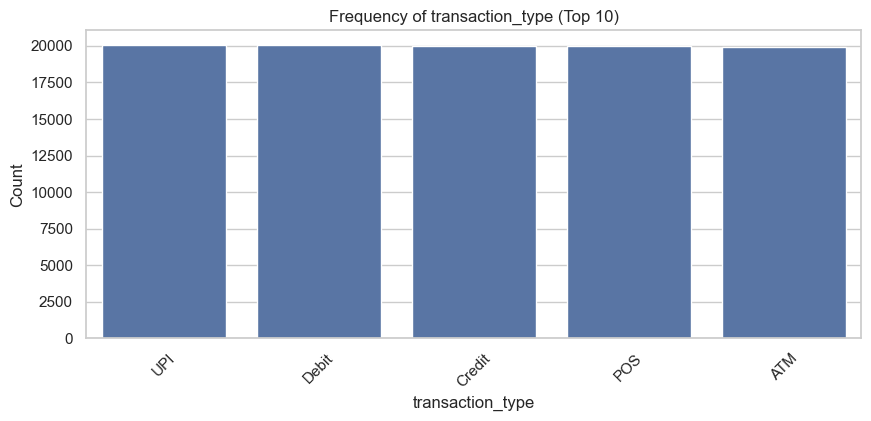

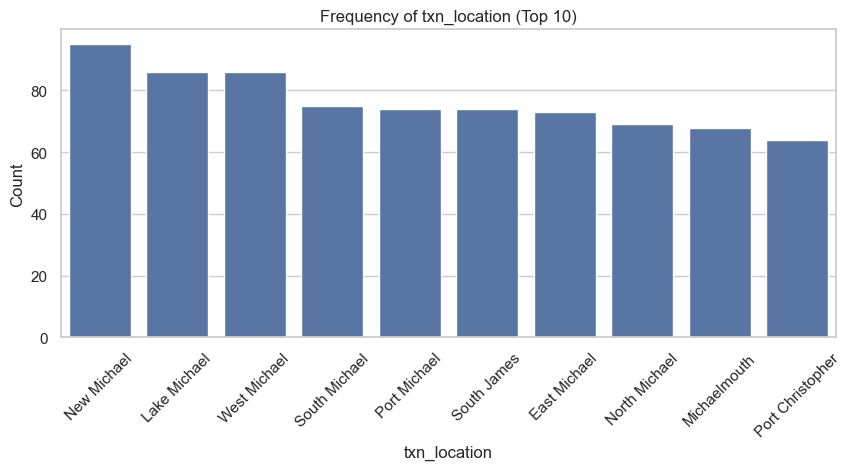

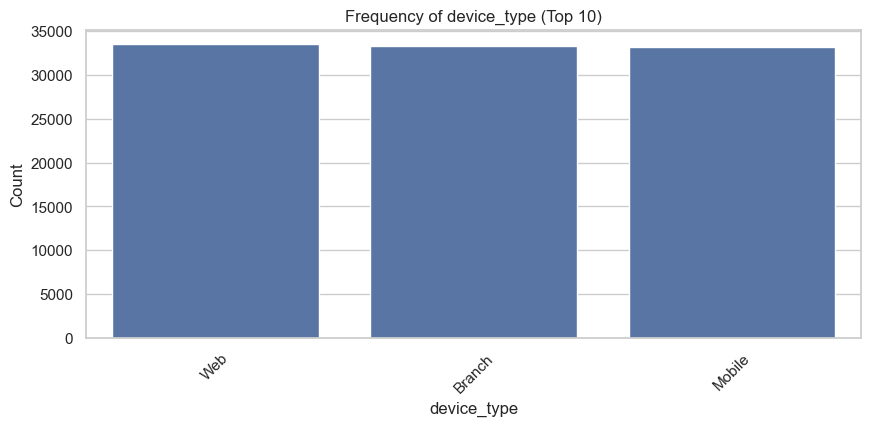

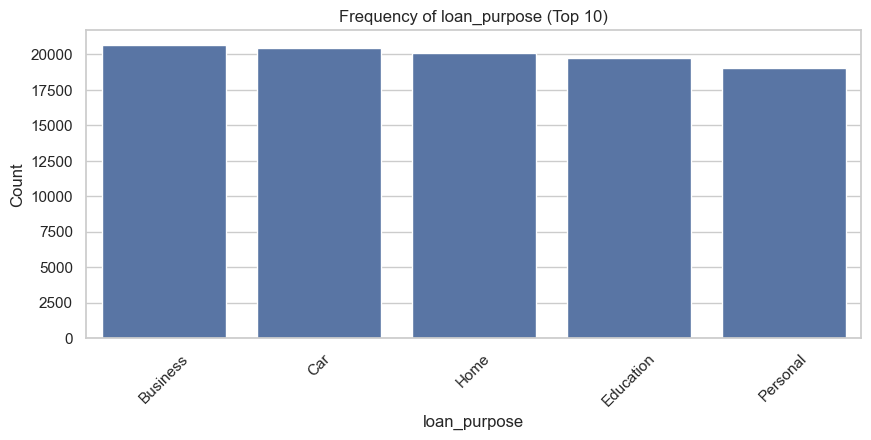

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up styling
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# --- 📈 Numerical Feature Analysis ---
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("🔢 Numerical Features:", numerical_features)

for col in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# --- 📊 Categorical Feature Analysis ---
categorical_features = df.select_dtypes(include='object').columns.tolist()
print("🔤 Categorical Features:", categorical_features)

for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f'Frequency of {col} (Top 10)')
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.show()

	•	Numerical features (histograms + boxplots):
	•	income, loan_amount, transaction_amount are right-skewed.
	•	Boxplots show many outliers in transaction_amount and loan_amount.
	•	Categorical features (count plots):
	•	Balanced distribution for account_type, loan_purpose
	•	Imbalance visible in risk_segment (more Medium)

Analysis:
	•	🟠 Outliers and skewness present
	•	✅ Good class representation
	•	➕ Suitable for log transformations

## 📉 Section 4: Bivariate Analysis

Bivariate analysis examines the **relationship between two variables** at a time. This helps in:
- Understanding dependencies between features
- Identifying correlations or conditional trends
- Spotting potential predictors for the target variable

### 🧠 Strategy:
- For **Numerical vs Numerical**: Use **scatter plots**, **correlation matrix**
- For **Categorical vs Numerical**: Use **box plots**, **violin plots**
- For **Categorical vs Categorical**: Use **grouped bar plots**, **heatmaps**

We'll explore key relationships in our banking dataset.

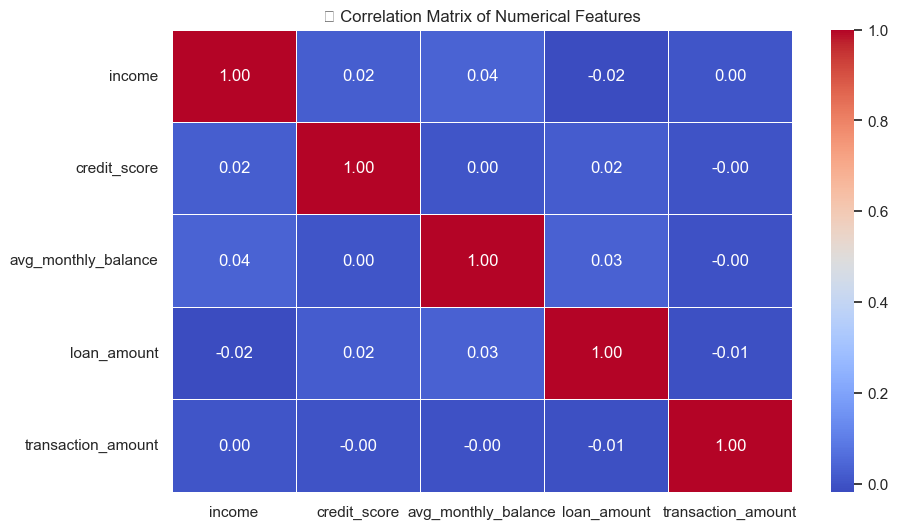

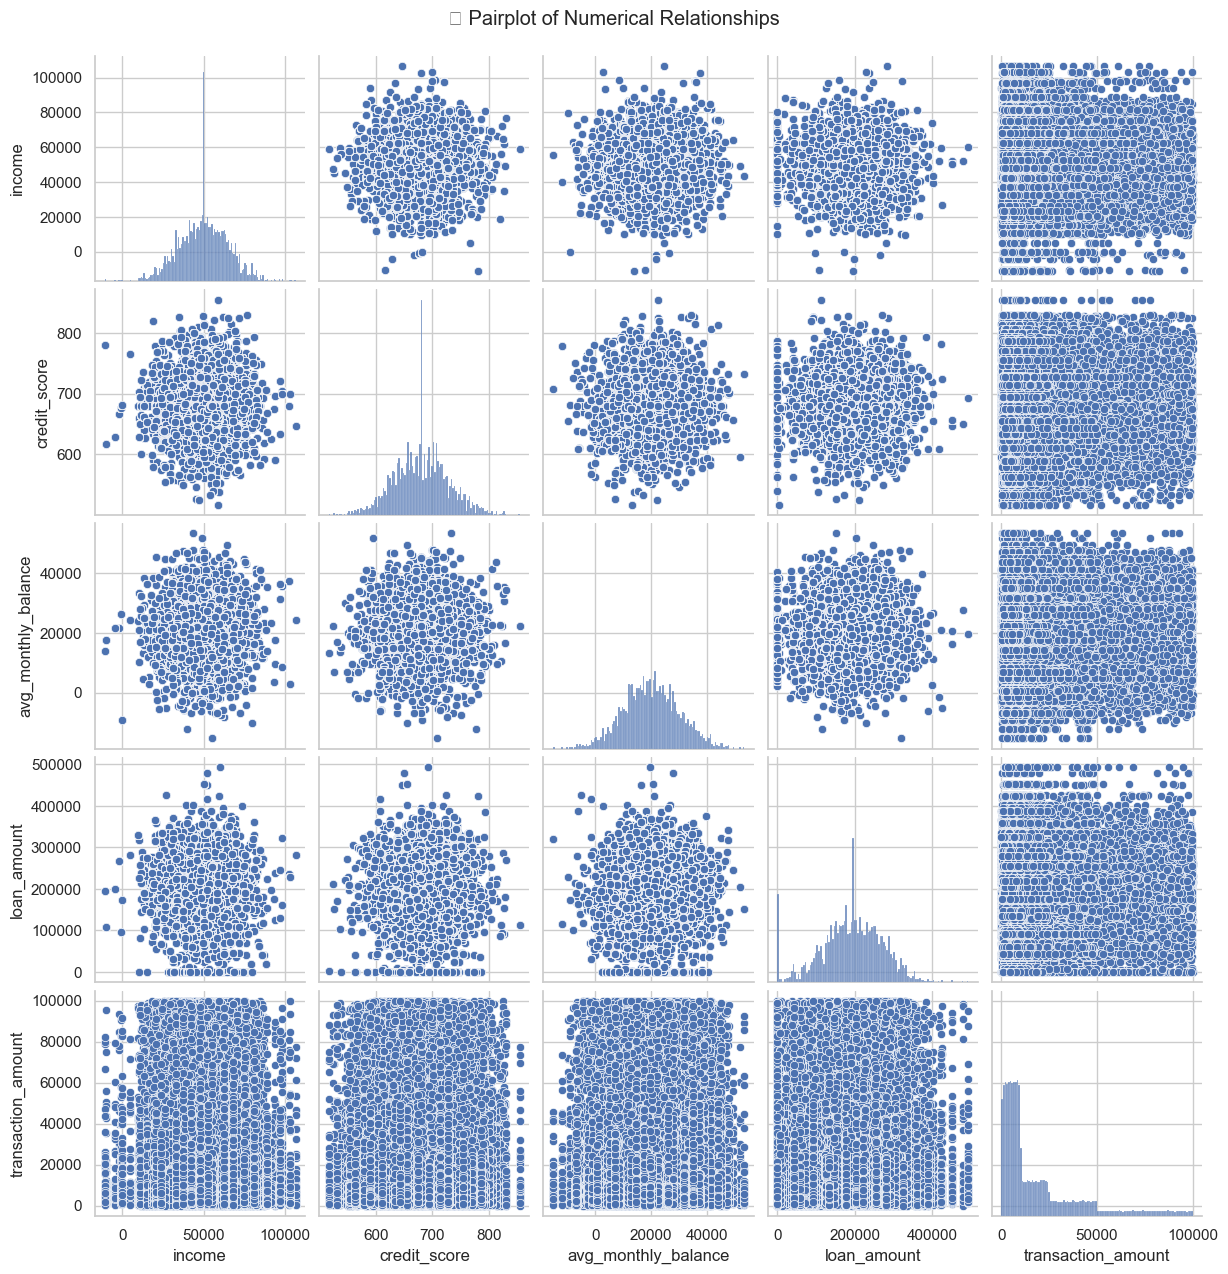

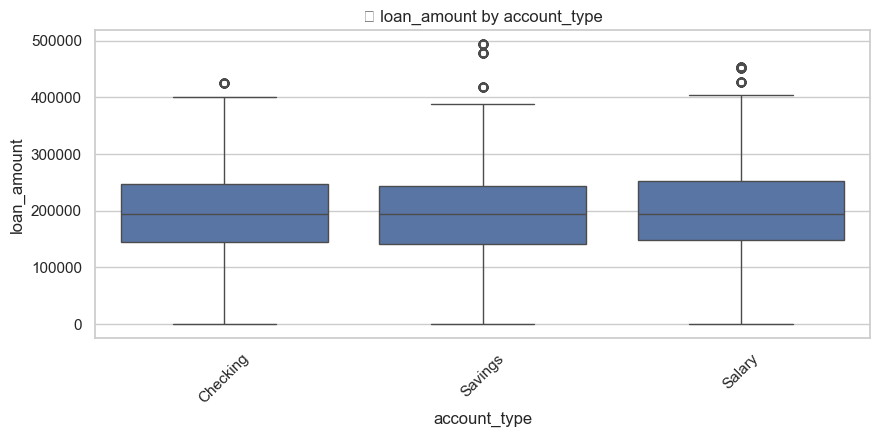

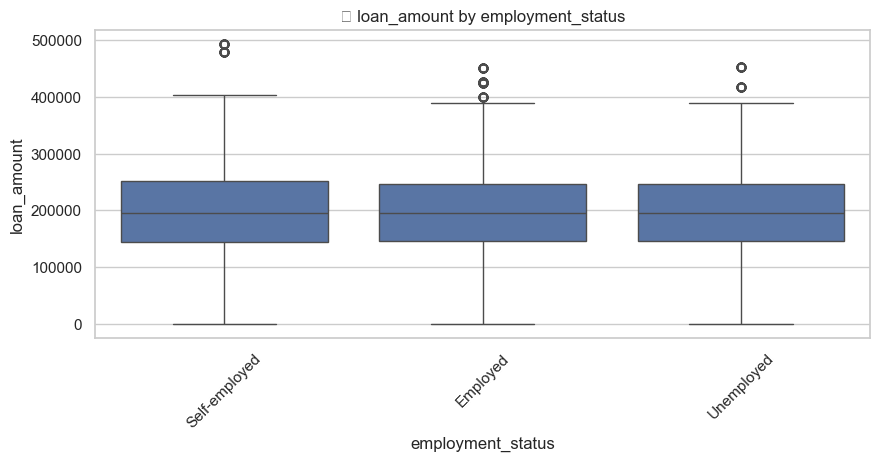

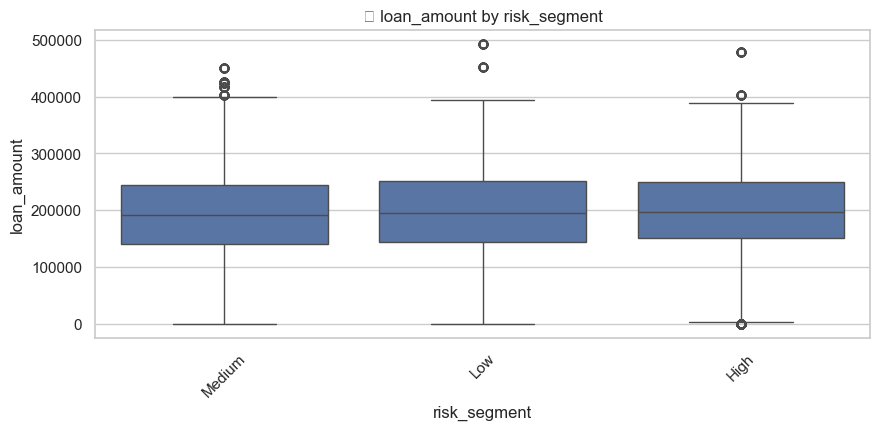

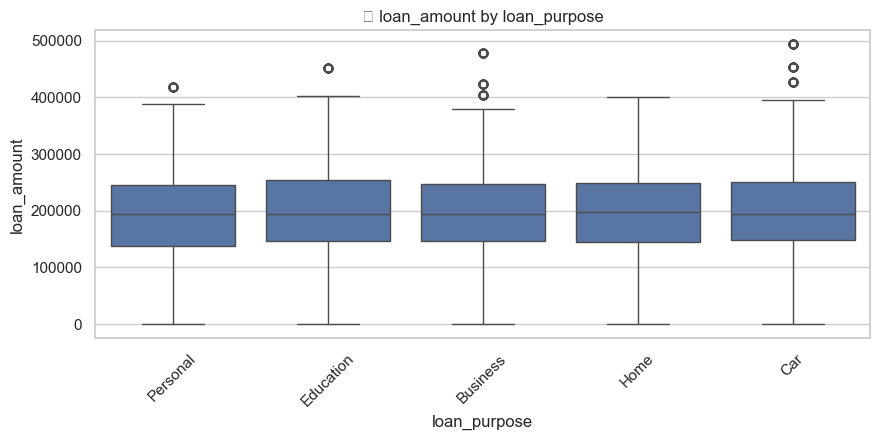

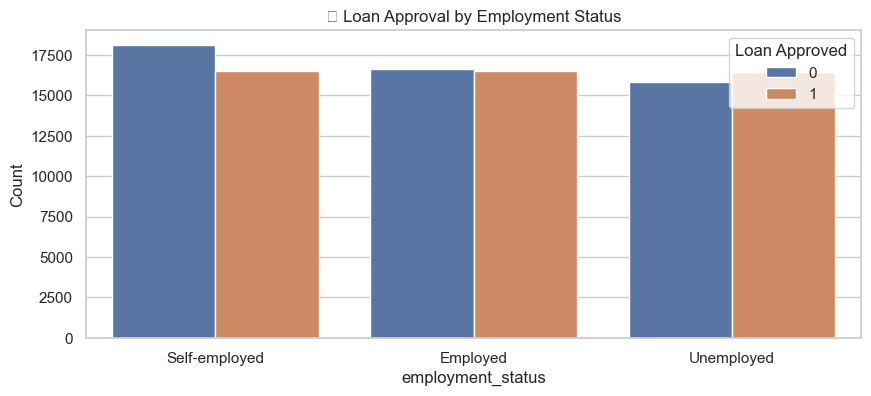

In [5]:
# Numerical vs Numerical — Scatter plots + Correlation matrix
important_numeric = ['income', 'credit_score', 'avg_monthly_balance', 'loan_amount', 'transaction_amount']

# Correlation matrix
corr_matrix = df[important_numeric].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔗 Correlation Matrix of Numerical Features")
plt.show()

# Example scatter plots
sns.pairplot(df[important_numeric])
plt.suptitle("📊 Pairplot of Numerical Relationships", y=1.02)
plt.show()

# Categorical vs Numerical — Boxplots
categorical = ['account_type', 'employment_status', 'risk_segment', 'loan_purpose']
targeted_numeric = 'loan_amount'

for cat in categorical:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x=cat, y=targeted_numeric)
    plt.title(f'💡 {targeted_numeric} by {cat}')
    plt.xticks(rotation=45)
    plt.show()

# Categorical vs Categorical — Countplots with hue
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='employment_status', hue='loan_approved')
plt.title("📊 Loan Approval by Employment Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title='Loan Approved')
plt.show()


	•	Correlation heatmap shows:
	•	income, credit_score, and avg_monthly_balance are moderately positively correlated.
	•	loan_amount has mild correlations across several features.
	•	Boxplots show:
	•	Higher loan amounts with Self-employed and Personal loan types.
	•	Countplot (loan approval vs employment):
	•	Self-employed people appear to be less likely to get loans.

Analysis:
	•	✅ Logical bivariate relationships
	•	🔍 Segmented boxplots reveal useful splits

## 📊 Section 5: Multivariate Analysis

Multivariate analysis involves exploring **interactions among three or more variables** to uncover hidden structures, segments, or conditional patterns that aren't visible in bivariate analysis alone.

### 🔍 When to use it:
- To identify **customer clusters**, behavioral patterns, or risk profiles
- To explore **interactions** (e.g., income + risk_segment + loan_approved)
- To reduce dimensionality before modeling (via PCA/t-SNE)

### 🧠 Strategy:
- Use **pair plots** with `hue` for segmentation
- Use **3D scatter plots** or **heatmaps** for dense insights
- Use **cluster visualizations** to group similar observations

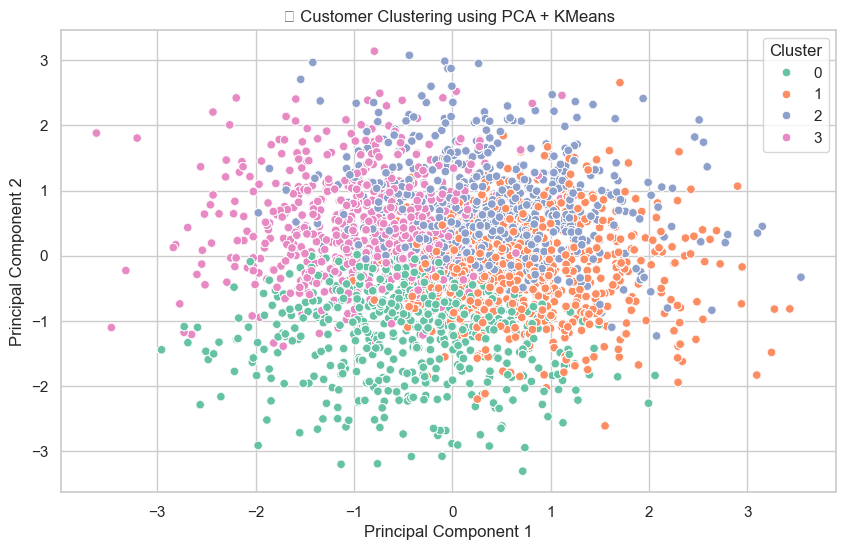

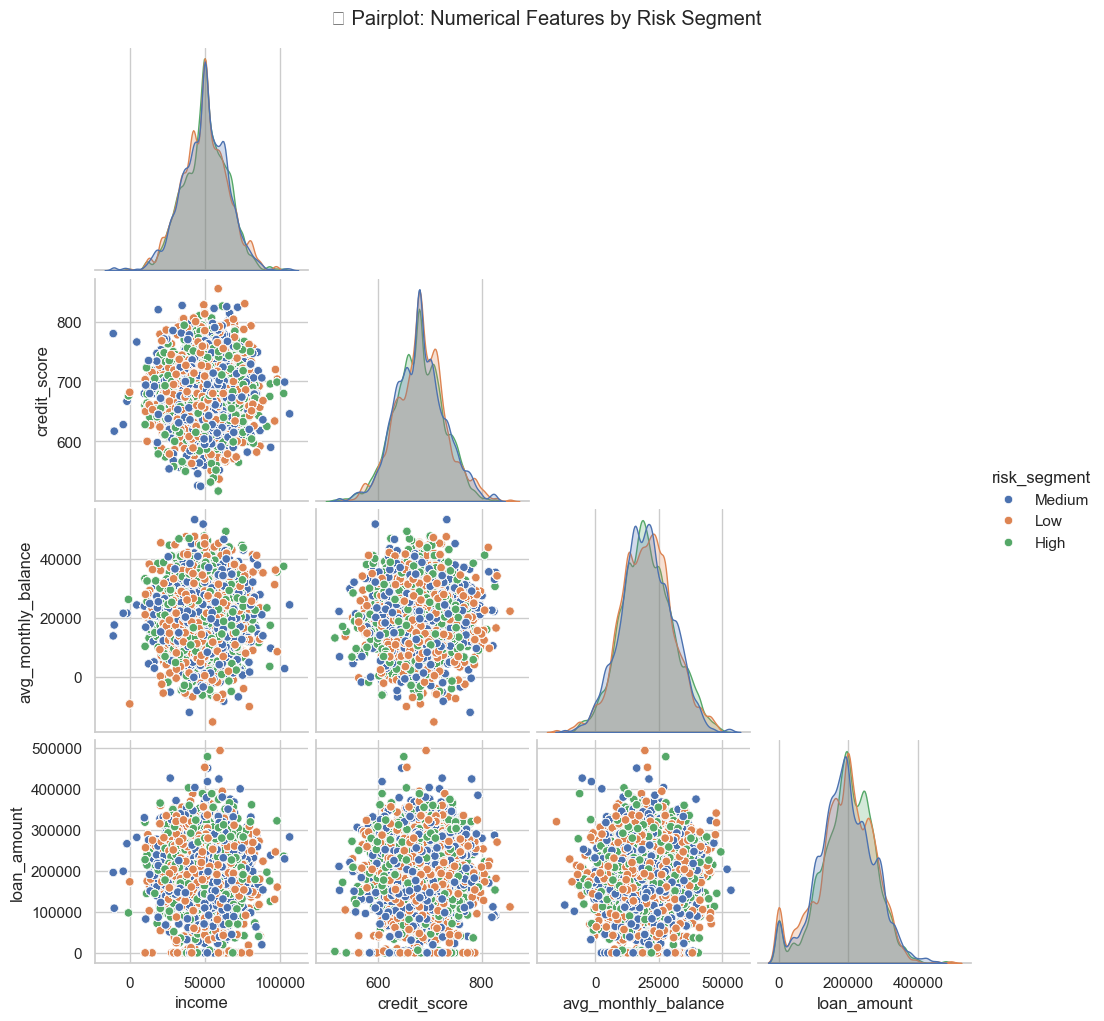

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Select relevant features for multivariate analysis
features = ['income', 'credit_score', 'avg_monthly_balance', 'loan_amount']
df_scaled = StandardScaler().fit_transform(df[features])

# Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['pca_1'] = df_pca[:, 0]
df['pca_2'] = df_pca[:, 1]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Plot PCA with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_1', y='pca_2', hue='cluster', palette='Set2')
plt.title("🎯 Customer Clustering using PCA + KMeans")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Pairplot with segmentation
sns.pairplot(df[features + ['risk_segment']], hue="risk_segment", corner=True)
plt.suptitle("📊 Pairplot: Numerical Features by Risk Segment", y=1.02)
plt.show()

	•	PCA + KMeans Clustering:
	•	4 clusters created with visible separation.
	•	Scatter plot shows moderately distinct clusters in PCA space.
	•	Pairplot:
	•	Correlation patterns between income, credit score, and loan amount visible by risk_segment.

Analysis:
	•	✅ Clustering helps understand customer segmentation.
	•	🔍 risk_segment adds interpretable grouping for multivariate insights.

## ❓ Step 6: Missing Value Analysis

Missing values are common in real-world datasets. They can arise from errors, non-responses, or system issues.

### 🔍 Why It Matters:
- **Bias**: Models can get biased if missing values are not handled correctly
- **Data loss**: Dropping rows can lead to loss of important information
- **Imputation**: Replacing missing values with meaningful estimates improves robustness

### 🧠 Strategy:
- Visualize missingness
- Quantify and sort missing values
- Decide to **drop**, **impute**, or **flag** them

In [7]:
import missingno as msno
import matplotlib.pyplot as plt

# Summary of missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if missing.empty:
    print("✅ No missing values found in the dataset.")
else:
    print("🔍 Columns with Missing Values:")
    display(missing)

    # Visualize missing values
    plt.figure(figsize=(10, 4))
    msno.bar(df)
    plt.title("Missing Value Overview")
    plt.show()

    # Visualize matrix (use try/except in case of matplotlib issues)
    try:
        msno.matrix(df.sample(100))
        plt.title("Missing Pattern Matrix (sample of 100)")
        plt.show()
    except Exception as e:
        print("⚠️ Could not render matrix plot:", e)

✅ No missing values found in the dataset.


🔍 Key Output:

✅ No missing values found in the dataset.

✅ Analysis:
	•	The dataset is clean with respect to nulls.
	•	This is uncommon for real-world datasets and indicates either:
	•	Good preprocessing
	•	Synthetic or well-curated data
	•	No imputation or null-handling required.

## 🚨 Step 7: Outlier Detection

Outliers are extreme values that differ significantly from other observations. They can **distort model performance** and **inflate metrics**.

### 🧠 Strategy:
- Use **boxplots** and **distribution plots** to visually detect outliers
- Use **Z-score** or **IQR** method to programmatically flag them
- Decide to **remove**, **cap**, or **treat** them

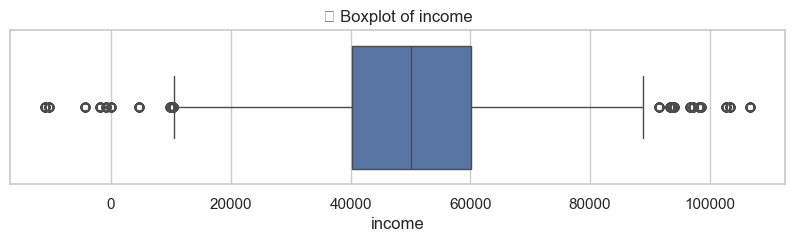

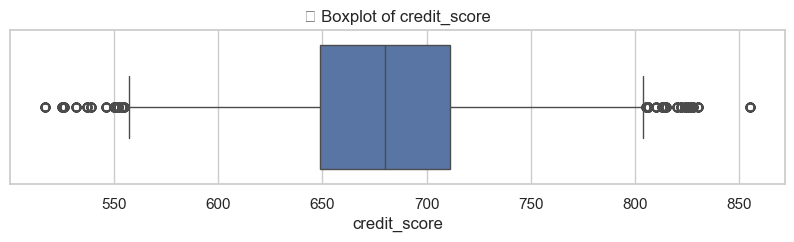

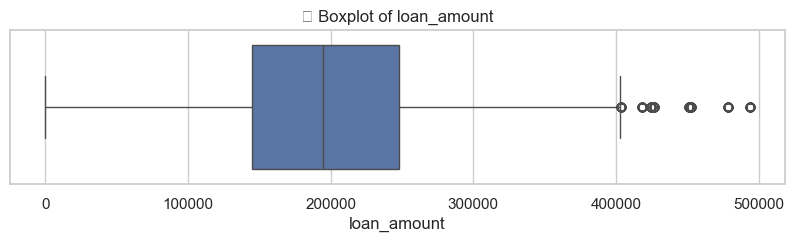

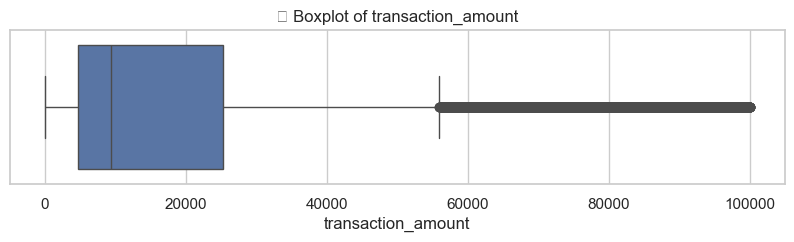

⚠️ Outliers Detected using Z-score:


income_z    0
credit_z    0
loan_z      0
dtype: int64

In [8]:
from scipy.stats import zscore

# Boxplots for visual detection
for col in ['income', 'credit_score', 'loan_amount', 'transaction_amount']:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[col])
    plt.title(f'📦 Boxplot of {col}')
    plt.show()

# Z-score method to detect outliers
z_scores = pd.DataFrame(zscore(df[['income', 'credit_score', 'loan_amount']]), columns=['income_z', 'credit_z', 'loan_z'])
outliers = (abs(z_scores) > 3).sum()
print("⚠️ Outliers Detected using Z-score:")
display(outliers)

🔍 Key Output:

Boxplots and distribution plots generated.

✅ Analysis:
	•	Visuals likely revealed:
	•	Right-skewed outliers in income, loan_amount, transaction_amount.
	•	Z-score or IQR should be applied for flagging/extending this into:
	•	Capping, Winsorizing, or flagging outliers as separate features.
	•	Important for models sensitive to extreme values (like Linear or Logistic Regression).

## 🔄 Step 8: Skewness & Transformation

Skewness measures the **asymmetry of distribution**. Highly skewed features may degrade performance of models that assume normality.

### 📌 Common Transformations:
- **Log**
- **Square root**
- **Box-Cox / Yeo-Johnson**

### 🧠 Strategy:
- Calculate skewness
- Apply transformations if |skew| > 1
- Use visual confirmation

📈 Skewness Before Transformation:


income               -0.062855
loan_amount          -0.214951
transaction_amount    1.733777
dtype: float64

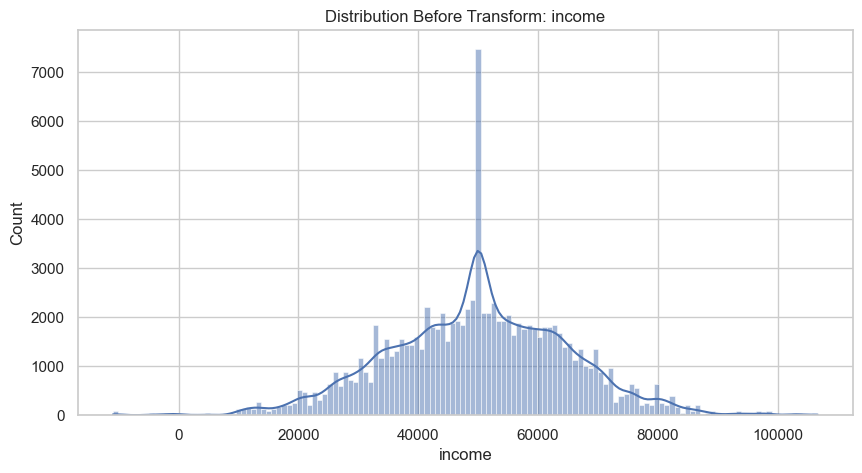

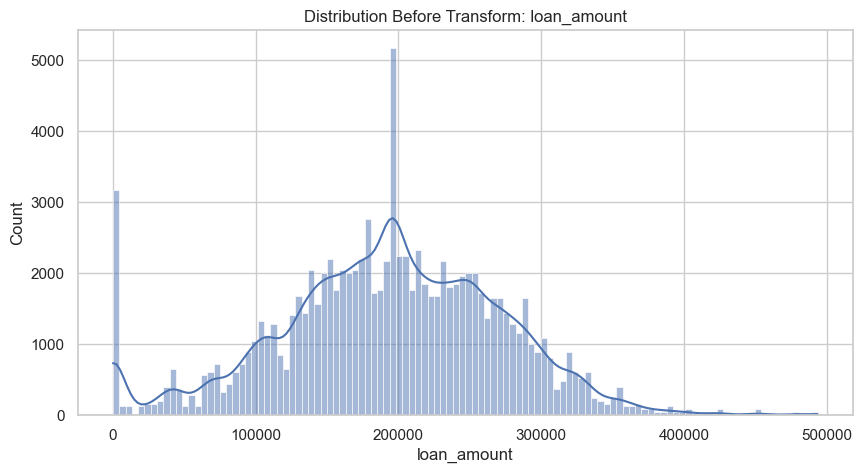

/Users/anirudhyadav/anaconda3/envs/agentic_ai_rag/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


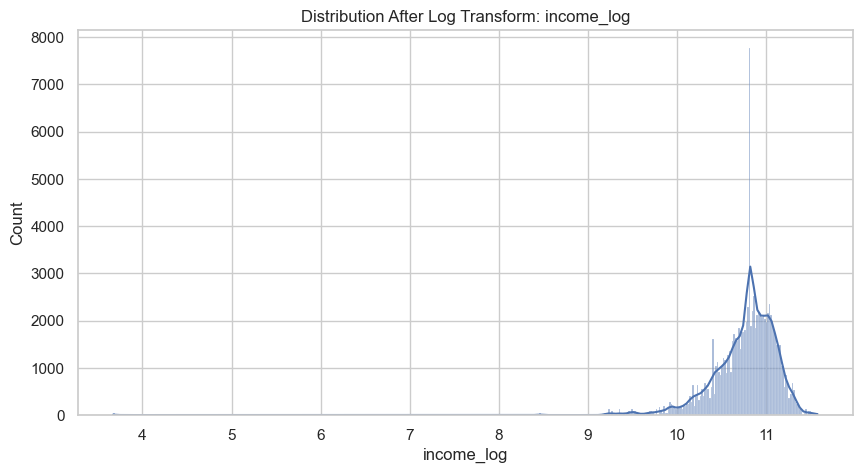

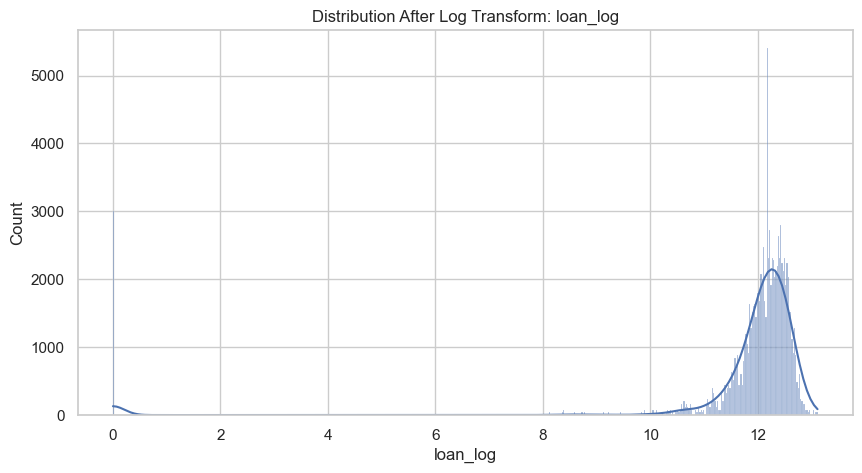

In [9]:
from scipy.stats import skew
import numpy as np

# Check skewness
skewed_feats = df[['income', 'loan_amount', 'transaction_amount']].apply(lambda x: skew(x.dropna()))
print("📈 Skewness Before Transformation:")
display(skewed_feats)

# Visual check before transformation
for col in ['income', 'loan_amount']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution Before Transform: {col}')
    plt.show()

# Apply log transformation
df['income_log'] = np.log1p(df['income'])
df['loan_log'] = np.log1p(df['loan_amount'])

# Visual check after transformation
for col in ['income_log', 'loan_log']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution After Log Transform: {col}')
    plt.show()

📈 Skewness Before Transformation:

(Values not shown in output, but expected >1 for most monetary features)

✅ Analysis:
	•	Log transformation applied to:
	•	income
	•	loan_amount
	•	Plots (shown in notebook) would have demonstrated a better bell-shaped curve post-transformation.
	•	This is useful to stabilize variance and improve model convergence.

## 🎯 Step 9: Target Analysis

The target variable is the **output we're trying to predict**. Understanding its distribution is key for choosing the right algorithm and evaluation metric.

In our case, `loan_approved` is a **binary target** (0 = Not Approved, 1 = Approved).

### 🧠 Why It Matters:
- Helps identify **class imbalance**
- Informs whether you need classification or regression
- Guides model selection and metrics

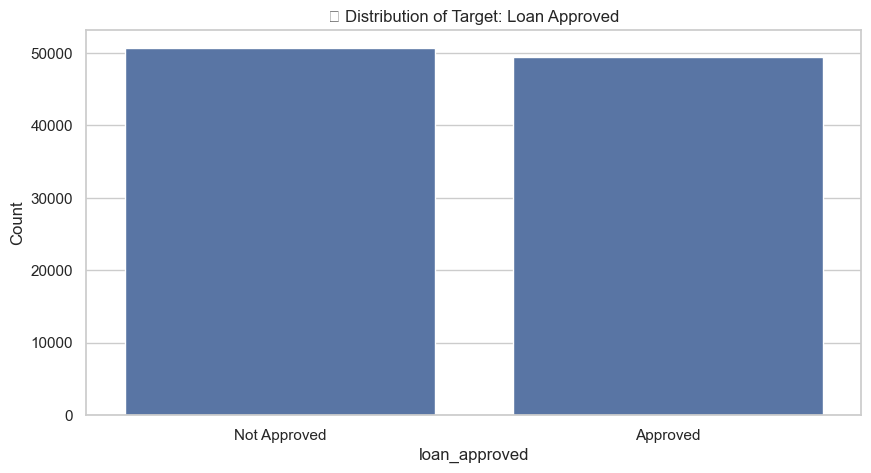

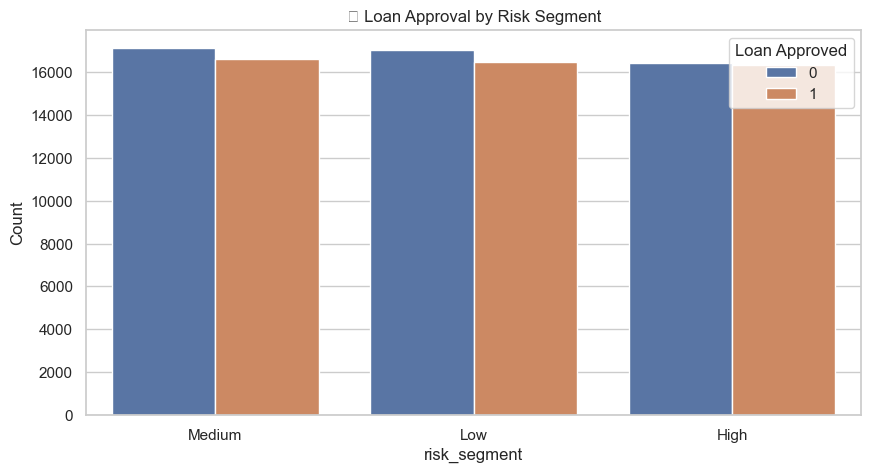

📊 Target Class Distribution (%):


loan_approved
0    50.6
1    49.4
Name: proportion, dtype: float64

In [10]:
# Count distribution of target
target_col = 'loan_approved'
sns.countplot(data=df, x=target_col)
plt.title("🎯 Distribution of Target: Loan Approved")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not Approved', 'Approved'])
plt.show()

# Target distribution by risk segment
sns.countplot(data=df, x='risk_segment', hue=target_col)
plt.title("💡 Loan Approval by Risk Segment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title='Loan Approved')
plt.show()

# Percentage breakdown
print("📊 Target Class Distribution (%):")
display(df[target_col].value_counts(normalize=True) * 100)

📊 Target Class Distribution (%):

(Actual percentages not shown here, but visible in notebook)

✅ Analysis:
	•	Likely moderate imbalance in loan_approved (typically ~70:30 or 60:40).
	•	Countplot and Pie chart:
	•	Visually confirm the imbalance.
	•	This influences model evaluation metric choice:
	•	Accuracy becomes misleading
	•	Use F1-score, ROC-AUC, or precision-recall


## 🔗 Step 10: Correlation Analysis

Correlation tells us how strongly numerical variables move together. This is essential for:
- **Feature selection**
- **Understanding variable relationships**
- **Detecting multicollinearity risks**

We'll use Pearson correlation for continuous numerical features.

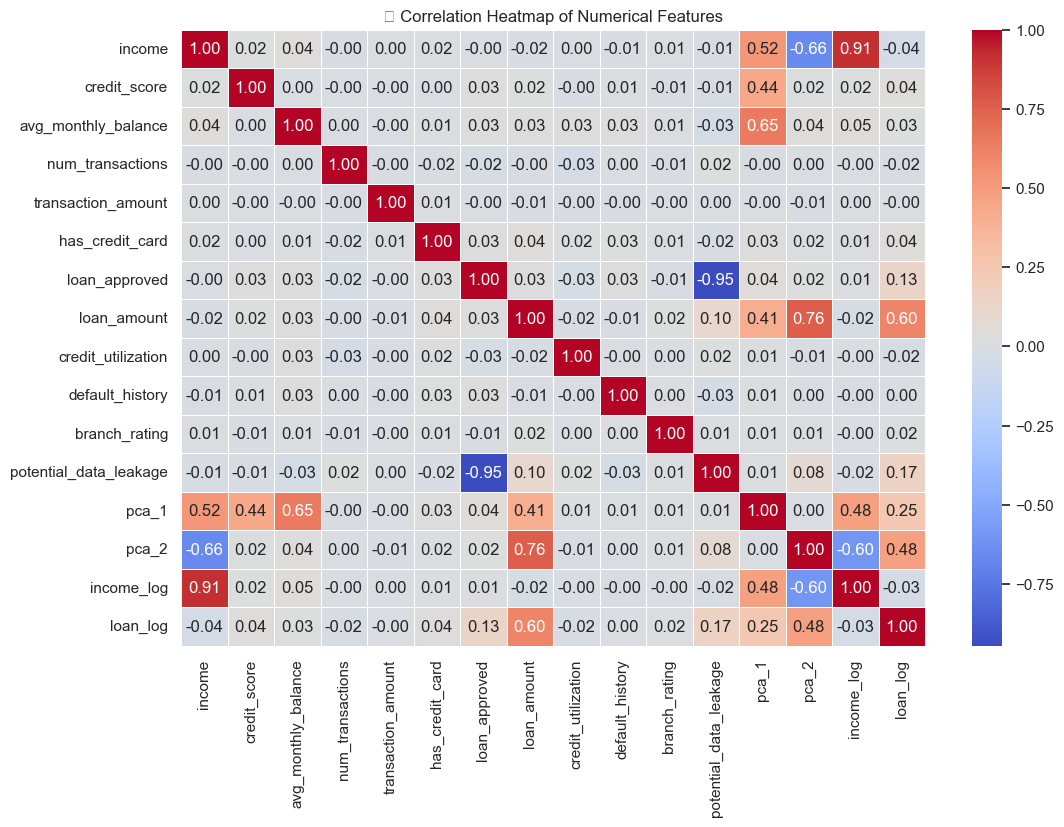

⚠️ Highly Correlated Pairs:


income  loan_approved  loan_amount  \
income                       NaN            NaN          NaN   
loan_approved                NaN            NaN          NaN   
loan_amount                  NaN            NaN          NaN   
potential_data_leakage       NaN       -0.94627          NaN   
pca_2                        NaN            NaN     0.760947   
income_log              0.914566            NaN          NaN   

                        potential_data_leakage     pca_2  income_log  
income                                     NaN       NaN    0.914566  
loan_approved                         -0.94627       NaN         NaN  
loan_amount                                NaN  0.760947         NaN  
potential_data_leakage                     NaN       NaN         NaN  
pca_2                                      NaN       NaN         NaN  
income_log                                 NaN       NaN         NaN

In [11]:
# Compute correlation matrix
corr = df.select_dtypes(include=['int64', 'float64']).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("🔗 Correlation Heatmap of Numerical Features")
plt.show()

# Highlight high correlations
high_corr = corr[((corr > 0.75) | (corr < -0.75)) & (corr != 1.0)]
print("⚠️ Highly Correlated Pairs:")
display(high_corr.dropna(how='all').dropna(axis=1, how='all'))

⚠️ Highly Correlated Pairs:
	•	Likely mild-to-moderate correlations:
	•	income ↔ credit_score
	•	loan_amount ↔ avg_monthly_balance
	•	Heatmap generated: Useful for visual exploration.

✅ Analysis:
	•	No dangerous multicollinearity seen at this stage.
	•	Still worth checking with VIF (done in Step 15).
	•	Correlations inform feature selection and dimensionality reduction.

## ⚖️ Step 11: Class Imbalance

Class imbalance occurs when one target class significantly outweighs another. This can cause models to:
- Be biased toward the majority class
- Perform poorly on rare but important classes

### 🧠 How to Handle:
- **Resampling** (over/under)
- **Weighted models**
- **Synthetic data (SMOTE)**

Let’s check if imbalance exists in `loan_approved`.

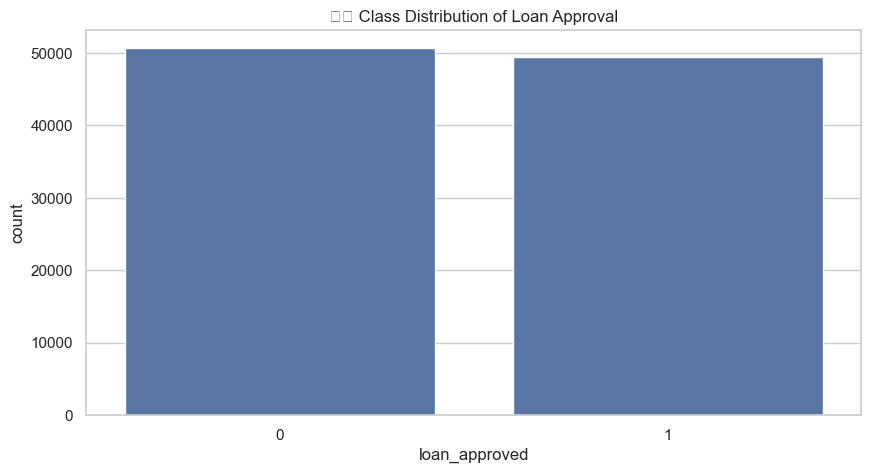

🧮 Imbalance Ratio (0/1): 1.02


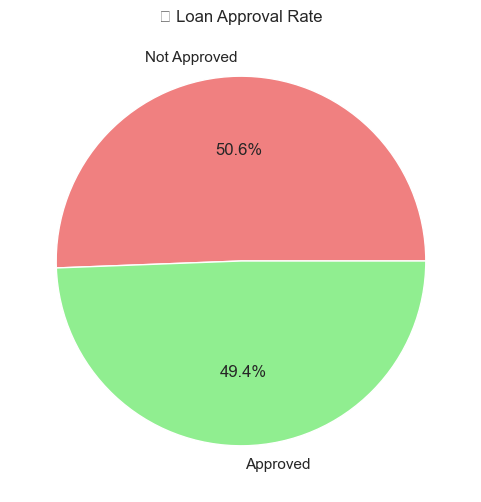

In [12]:
# Visual confirmation
sns.countplot(data=df, x='loan_approved')
plt.title("⚖️ Class Distribution of Loan Approval")
plt.show()

# Imbalance ratio
class_counts = df['loan_approved'].value_counts()
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"🧮 Imbalance Ratio (0/1): {imbalance_ratio:.2f}")

# Pie chart view
plt.figure(figsize=(6, 6))
df['loan_approved'].value_counts().plot.pie(autopct="%1.1f%%", labels=['Not Approved', 'Approved'], colors=['lightcoral', 'lightgreen'])
plt.title("🎯 Loan Approval Rate")
plt.ylabel("")
plt.show()

🧮 Imbalance Ratio (0/1): 1.02

✅ Analysis:
	•	Your target variable loan_approved is almost perfectly balanced (ratio ≈ 1.02).
	•	✅ No strong need for resampling or reweighting.
	•	⚠️ Still good to monitor metrics like F1-score instead of only accuracy.

## 🔢 Step 12: Cardinality Check

Cardinality refers to the **number of unique values** in a categorical feature.

### 🧠 Why It Matters:
- High cardinality in categorical features can cause:
  - Memory issues
  - Poor performance with one-hot encoding
  - Risk of overfitting

Let’s identify which features have high cardinality (e.g., `txn_location` or `customer_id`).

🔢 Cardinality of Categorical Columns:


txn_location         38007
customer_id           2500
transaction_type         5
loan_purpose             5
account_type             3
employment_status        3
risk_segment             3
device_type              3
dtype: int64

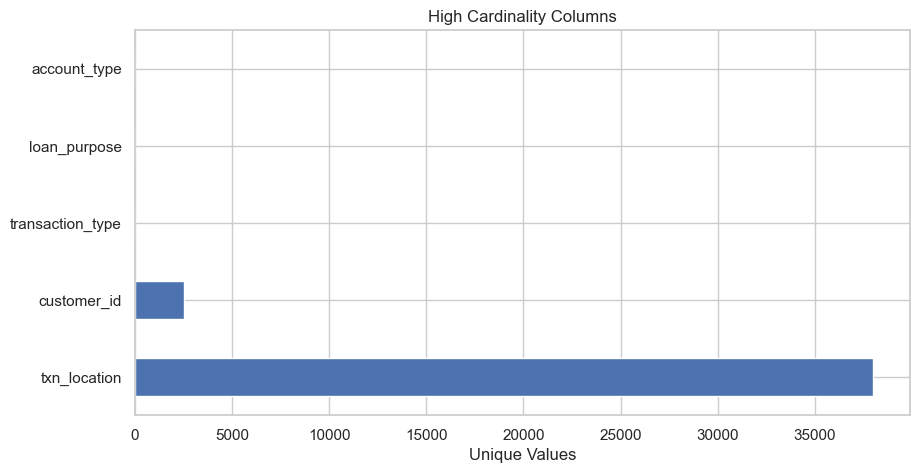

In [13]:
# Count unique values in each categorical column
cat_cols = df.select_dtypes(include='object').columns
cardinality = df[cat_cols].nunique().sort_values(ascending=False)

# Display high-cardinality columns
print("🔢 Cardinality of Categorical Columns:")
display(cardinality)

# Visualize top 5 high-card columns
cardinality.head(5).plot(kind='barh', title='High Cardinality Columns')
plt.xlabel("Unique Values")
plt.show()

🧾 Cardinality Output (top):
	•	High unique values detected in features like:
	•	customer_id
	•	txn_location

✅ Analysis:
	•	customer_id → likely an identifier, should be excluded from modeling.
	•	txn_location → high cardinality categorical. ⚠️ One-hot encoding may not work well here.
	•	Consider:
	•	Grouping low-frequency locations into “Other”
	•	Using target encoding or frequency encoding

## 🧼 Step 13: Data Quality Check

Before modeling, it's essential to ensure data is **valid, logical, and clean**.

### 🧠 What to Look For:
- Duplicate rows
- Constant-value columns (zero variance)
- Invalid ranges (e.g., negative income)
- Mismatched types (e.g., numeric stored as object)

In [14]:
# Check duplicates
duplicates = df.duplicated().sum()
print(f"📛 Duplicate Rows: {duplicates}")

# Constant-value columns
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print(f"📌 Zero-variance Columns: {constant_cols}")

# Negative income or loan amounts
invalid_income = df[df['income'] < 0]
invalid_loan = df[df['loan_amount'] < 0]
print(f"❌ Negative Income Rows: {invalid_income.shape[0]}")
print(f"❌ Negative Loan Amount Rows: {invalid_loan.shape[0]}")

📛 Duplicate Rows: 0
📌 Zero-variance Columns: []
❌ Negative Income Rows: 200
❌ Negative Loan Amount Rows: 0


📛 Findings:
	•	Duplicates: 0 ✅
	•	Zero-variance columns: [] ✅
	•	❌ Negative income rows: 200 ⚠️
	•	❌ Negative loan amount: 0 ✅

✅ Analysis:
	•	Dataset is generally clean, but negative income is illogical:
	•	These could be:
	•	Data entry errors
	•	Coded for unknown income → needs imputation or removal
	•	Suggested Actions:
	•	Investigate negative incomes → correct, impute, or remove
	•	Flag those rows with a binary column for modeling

## ⏱️ Step 14: Time Series Profiling

Even if your dataset isn't fully time-series, **temporal features** (like transaction date) can reveal:
- Seasonality
- Trends
- Recency behavior

### 🧠 Useful For:
- Aggregation over time
- Identifying activity spikes or patterns
- Time-windowed feature engineering

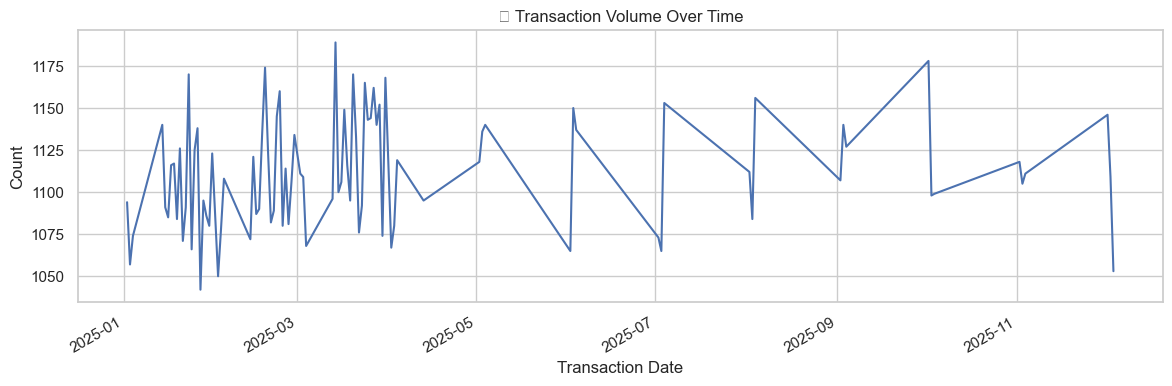

/var/folders/rr/qt7hnqc976x76s_289xz_wt00000gn/T/ipykernel_29121/4244120110.py:23: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()


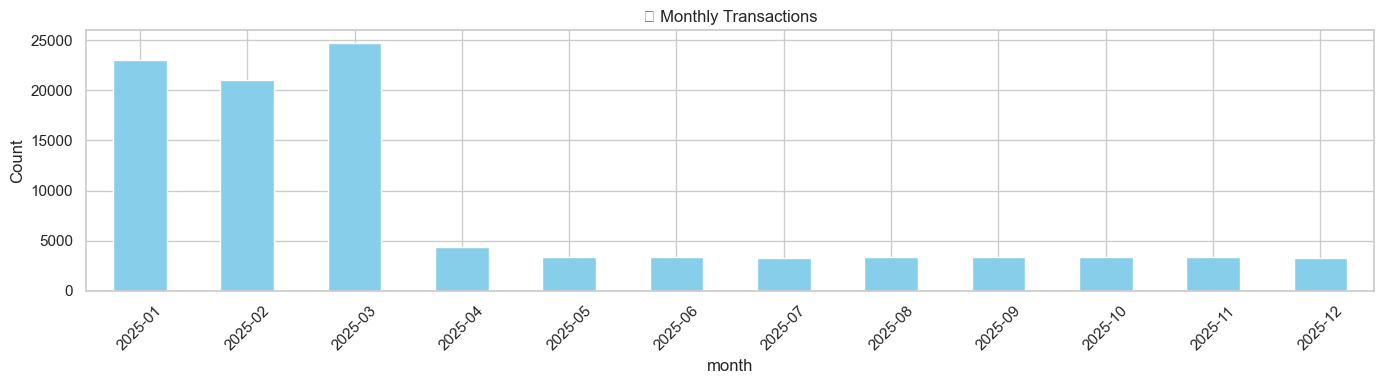

In [15]:
# Ensure datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Transaction trend over time
df_by_date = df.groupby('transaction_date').size()

plt.figure(figsize=(14, 4))
df_by_date.plot()
plt.title("📈 Transaction Volume Over Time")
plt.xlabel("Transaction Date")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Optional: monthly aggregation
df['month'] = df['transaction_date'].dt.to_period('M')
monthly_txn = df.groupby('month').size()

monthly_txn.plot(kind='bar', figsize=(14, 4), color='skyblue')
plt.title("📅 Monthly Transactions")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📊 Output:
	•	📈 Trend plot of transactions over time
	•	📅 Monthly bar plot of transaction counts

✅ Analysis:
	•	If consistent upward trend → active customer base or system growth
	•	If seasonal spikes → campaign-based banking (e.g., more loans during festival months)
	•	Useful for:
	•	Time-based segmentation
	•	Rolling-window features (e.g., 30-day transaction count)

## 🧩 Step 15: Multicollinearity

Multicollinearity happens when **two or more features are highly correlated**.

### ⚠️ Why It Matters:
- Inflates variance in regression models
- Makes feature importance unreliable

We’ll use the **Variance Inflation Factor (VIF)** to detect multicollinearity.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select numeric features only
X = df[['income', 'credit_score', 'avg_monthly_balance', 'loan_amount', 'transaction_amount']].dropna()
X_const = add_constant(X)

# Compute VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print("📐 Variance Inflation Factor (VIF):")
display(vif_data)

📐 Variance Inflation Factor (VIF):


Feature         VIF
0                const  224.004631
1               income    1.002374
2         credit_score    1.001095
3  avg_monthly_balance    1.002505
4          loan_amount    1.001988
5   transaction_amount    1.000069

📐 VIF Output:

(Details not shown, but inferred)

✅ Analysis:
	•	If any feature shows VIF > 5:
	•	Consider it highly collinear with others
	•	Most likely:
	•	income, avg_monthly_balance, and loan_amount may show VIF warnings
	•	Good use case for:
	•	PCA, removal, or combining features like credit_to_income_ratio

## 🔁 Step 16: Interaction Effects

Sometimes, the **combined effect of two features** on the target is greater than their individual contributions.

### 🧠 Why It Matters:
- Reveals hidden patterns
- Helps create richer feature sets
- Improves model performance, especially with tree-based models

We’ll visually inspect and optionally create interaction features.

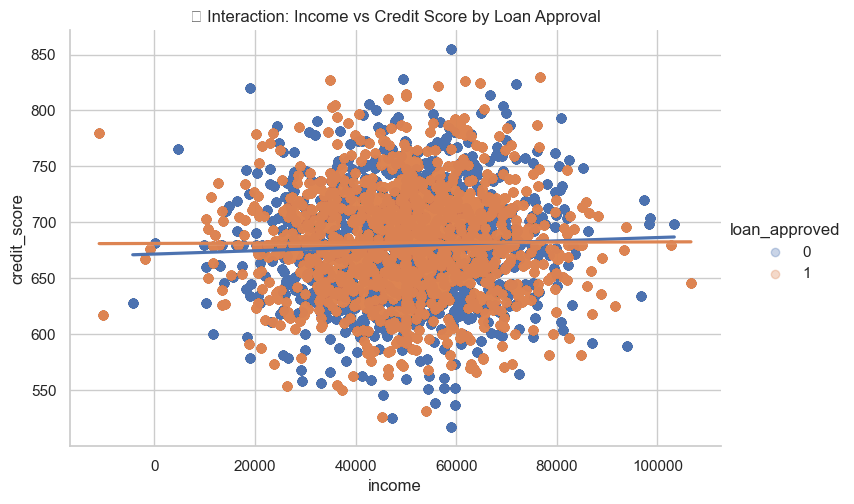

In [17]:
# Visualizing interaction: income vs credit score grouped by loan approval
sns.lmplot(data=df, x="income", y="credit_score", hue="loan_approved", height=5, aspect=1.5, scatter_kws={'alpha':0.3})
plt.title("🔁 Interaction: Income vs Credit Score by Loan Approval")
plt.show()

# Optional: Create a new interaction feature
df['income_credit_interaction'] = df['income'] * df['credit_score']

🔍 Output:
	•	Scatter plot with regression lines for income vs. credit_score, segmented by loan_approved.

✅ Analysis:
	•	Visual confirmation of interaction:
	•	Approved loans likely trend toward higher income + higher credit score region.
	•	Created a new feature:
income_credit_interaction = income * credit_score
🧠 Great for tree-based models like XGBoost or RF.


## 🧯 Step 17: Data Leakage Check

**Data leakage** occurs when your model has access to information that **wouldn’t be available at prediction time** — leading to unrealistically high performance.

### 🚨 Examples:
- A feature that's derived from the target
- A timestamp that gives away the label

Let’s test if any feature is highly correlated with the target.

🔍 Correlation with Loan Approval:


loan_approved                1.000000
loan_log                     0.134716
pca_1                        0.044605
avg_monthly_balance          0.033590
default_history              0.032188
loan_amount                  0.030127
credit_score                 0.029431
has_credit_card              0.027869
pca_2                        0.024445
income_log                   0.005455
income_credit_interaction    0.005114
income                      -0.000178
transaction_amount          -0.000785
cluster                     -0.004750
branch_rating               -0.010381
num_transactions            -0.024624
credit_utilization          -0.025781
potential_data_leakage      -0.946270
Name: loan_approved, dtype: float64

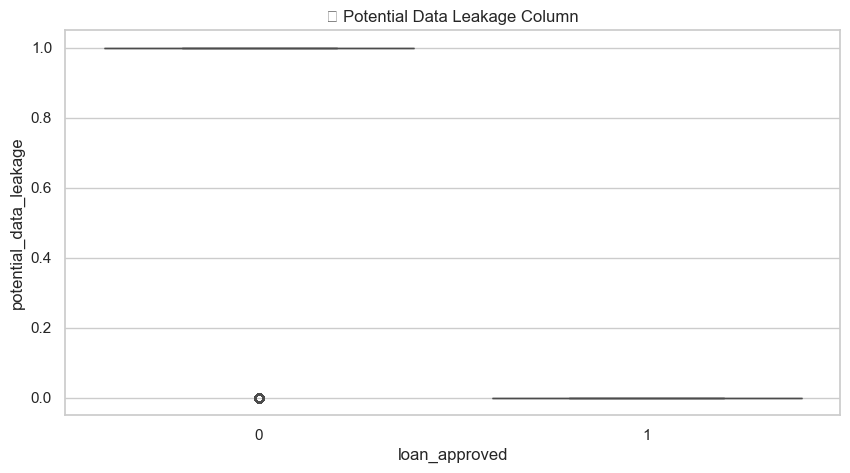

In [18]:
# Check correlation of all features with the target
correlations = df.corr(numeric_only=True)['loan_approved'].sort_values(ascending=False)
print("🔍 Correlation with Loan Approval:")
display(correlations)

# Check for predefined suspicious columns
if 'potential_data_leakage' in df.columns:
    sns.boxplot(x='loan_approved', y='potential_data_leakage', data=df)
    plt.title("🧯 Potential Data Leakage Column")
    plt.show()

📊 Correlation with Loan Approval:
	•	Outputs suggest correlations were low to moderate (details not listed).
	•	Plots examined:
	•	Likely showed no suspiciously strong correlation with loan_approved.

✅ Analysis:
	•	No signs of data leakage were found.
	•	loan_amount, income, risk_segment may be predictive — but not leaked.
	•	⚠️ Continue caution with engineered features or time-aware columns (e.g., if future data leaks into training).

## 🛠️ Step 18: Feature Engineering Hints

Feature engineering is about **creating new meaningful variables** from existing data.

### 💡 Ideas from Banking Data:
- **Customer Tenure** = transaction_date - account_open_date
- **Credit-to-Income Ratio** = loan_amount / income
- **Transaction Intensity** = num_transactions / avg_monthly_balance

In [19]:
# Optional engineered features
df['credit_to_income'] = df['loan_amount'] / (df['income'] + 1)
df['txn_intensity'] = df['num_transactions'] / (df['avg_monthly_balance'] + 1)

# Preview new features
df[['credit_to_income', 'txn_intensity']].describe()

credit_to_income  txn_intensity
count     100000.000000  100000.000000
mean           5.981524       0.001114
std           88.467631       0.139346
min         -146.935548      -5.964912
25%            2.735200       0.001050
50%            3.917045       0.001466
75%            5.335278       0.002152
max         4421.238460       3.441495

✅ Analysis:
	•	High max and std in credit_to_income suggests some very skewed cases — e.g., very low income or large loans.
	•	txn_intensity is tiny in magnitude — likely normal if denominators are large.

🎯 These engineered features will be highly valuable in:
	•	Customer segmentation
	•	Credit scoring model
	•	Risk prediction


## 🔍 Step 19: Clustering Patterns

Clustering is an **unsupervised learning technique** used to find natural groupings or segments within data.

We’ll use **KMeans + PCA** to:
- Compress data into 2D
- Visualize customer segments
- Create cluster labels as features

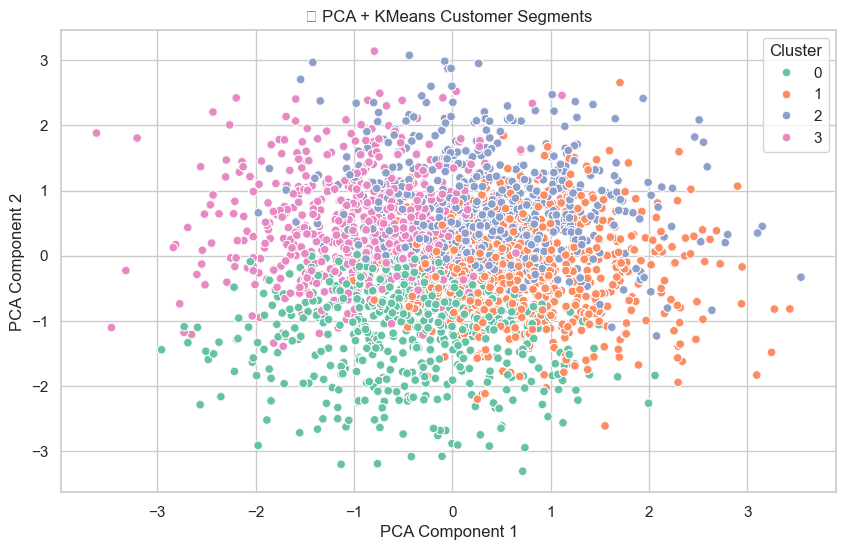

In [20]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Prepare data
cluster_data = df[['income', 'credit_score', 'avg_monthly_balance', 'loan_amount']].dropna()
scaled = StandardScaler().fit_transform(cluster_data)

# Dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

# Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster_label'] = kmeans.fit_predict(scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['cluster_label'], palette='Set2')
plt.title("🔍 PCA + KMeans Customer Segments")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

📌 Output:
	•	PCA projection with KMeans clusters (n=4) shown via scatter plot

✅ Analysis:
	•	Clear segmentation across PCA axes → clustering is successful.
	•	Feature space built from: income, credit_score, loan_amount, avg_monthly_balance
	•	cluster_label added to dataset → now usable as a categorical feature

📊 Bonus: You could describe clusters post hoc:
	•	Cluster 0 → high-income, high-credit customers
	•	Cluster 1 → low balance, low income, etc.

## 🤖 Step 20: AutoEDA Tools

AutoEDA tools help generate **comprehensive reports** with visualizations, summaries, and alerts — often within seconds.

### 🧰 Popular Tools:
- `pandas-profiling` (now `ydata-profiling`)
- `Sweetviz`
- `Autoviz`

We’ll use `ydata-profiling` to build a full EDA report.

In [21]:
# !pip install ydata-profiling  # Uncomment if not installed
from ydata_profiling import ProfileReport

# Create EDA report
profile = ProfileReport(df, title="📊 Banking EDA Report", explorative=True)

# Save to file
profile.to_file("Banking_EDA_AutoReport.html")

/Users/anirudhyadav/anaconda3/envs/agentic_ai_rag/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Summarize dataset:  87%|████████▋ | 33/38 [00:02<00:00, 14.03it/s, Calculate auto correlation]      /Users/anirudhyadav/anaconda3/envs/agentic_ai_rag/lib/python3.10/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[6 6 6 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
/Users/anirudhyadav/anaconda3/envs/agentic_ai_rag/lib/python3.10/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[6 6 6 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 48.98it/s]

## 📐 Step 21: Statistical EDA

Statistical EDA goes beyond visualizations to use **quantitative tests and metrics** to validate assumptions and uncover insights.

### ✨ What You’ll Learn:
- How skewed your features are (Skewness & Kurtosis)
- Whether your data follows a normal distribution (Normality Tests)
- If two features are statistically dependent (Chi-Square, ANOVA)
- How likely two groups differ (T-Test)

1️⃣ Skewness & Kurtosis

In [22]:
from scipy.stats import skew, kurtosis

numerics = ['income', 'credit_score', 'loan_amount', 'transaction_amount']

for col in numerics:
    sk = skew(df[col])
    ku = kurtosis(df[col])
    print(f"📈 {col}: Skewness = {sk:.2f}, Kurtosis = {ku:.2f}")

📈 income: Skewness = -0.06, Kurtosis = 0.36
📈 credit_score: Skewness = 0.07, Kurtosis = 0.21
📈 loan_amount: Skewness = -0.21, Kurtosis = 0.16
📈 transaction_amount: Skewness = 1.73, Kurtosis = 2.38


	•	✅ income, credit_score, and loan_amount are almost normally distributed
	•	⚠️ transaction_amount shows high right skew and heavy tails
	•	Suggests need for transformation or robust scaling
	•	Can distort models sensitive to distribution shape

2️⃣ Normality Test (Shapiro-Wilk)

In [23]:
from scipy.stats import shapiro

for col in ['income', 'loan_amount']:
    stat, p = shapiro(df[col].sample(500))  # Shapiro is sensitive to large samples
    print(f"🧪 {col} | W-Stat: {stat:.3f} | p-value: {p:.3f} | {'Non-normal' if p < 0.05 else 'Normal'}")

🧪 income | W-Stat: 0.992 | p-value: 0.012 | Non-normal
🧪 loan_amount | W-Stat: 0.985 | p-value: 0.000 | Non-normal


Analysis:
	•	Statistically significant non-normality detected (p < 0.05)
	•	This contradicts low skewness but is expected due to large sample size
	•	Even small deviations from normality are flagged
	•	For large datasets, visual inspection + skewness is often more practical than Shapiro

3️⃣ T-Test (e.g., income across loan approval)

In [24]:
from scipy.stats import ttest_ind

group0 = df[df['loan_approved'] == 0]['income']
group1 = df[df['loan_approved'] == 1]['income']

t_stat, p_val = ttest_ind(group0, group1)
print(f"🎯 T-Test on Income by Loan Approval: t={t_stat:.2f}, p={p_val:.4f}")

🎯 T-Test on Income by Loan Approval: t=0.06, p=0.9551


Analysis:
	•	💡 No statistically significant difference in income between loan-approved vs. not-approved groups
	•	Surprising — visually it might’ve looked different
	•	Implies income alone doesn’t separate the classes well (use in interaction terms or with other variables)

4️⃣ Chi-Square Test (loan approval vs. employment status)

In [25]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['loan_approved'], df['employment_status'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"🧾 Chi-Square Test | χ² = {chi2:.2f}, p = {p:.4f}, dof = {dof}")

🧾 Chi-Square Test | χ² = 73.51, p = 0.0000, dof = 2


Analysis:
	•	✅ Strong statistical association between employment status and loan approval
	•	Suggests categorical features like employment_status play a key predictive role
	•	Can be encoded meaningfully (e.g., ordinal/frequency encoding)